# <center>  Python for biologists

## Lectures 19 and 20, Internet
16.03.2024, 30.03.2024


> Nikita Vaulin, vaulin@ro.ru, tg: @nvaulin
    

---

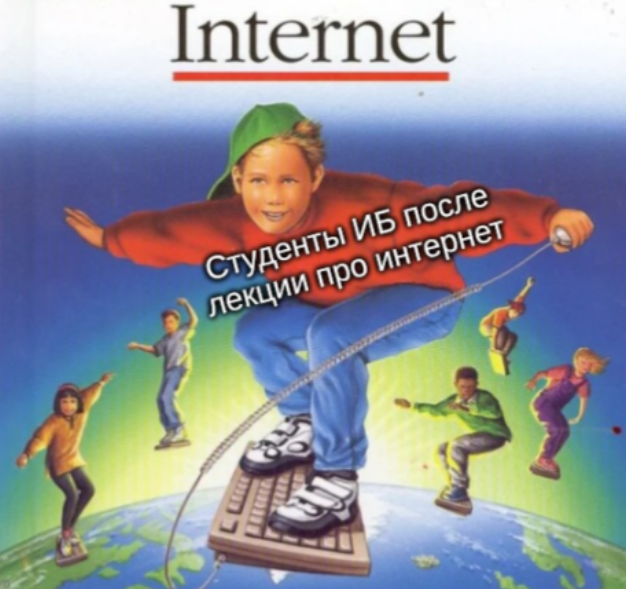


>В этой лекции мы не будем разбирать всякие низкоуровневые штуки по типу протоколов TCP/IP и того, как, куда и зачем бегут электроны по проводочкам. Вместо этого мы посмотрим только на самую верхушку айсберга, знания которой могут оказаться наиболее востребованными на практике


## Терминология
По сути интернет это просто набор компьютеров (в широком смысле), которые общаются между собой, пользуясь определёнными правилами &mdash; **протоколами**. В сети используются различные протоколы, которые подходят для различных задач. Так, вы, например, знакомы с протоколом **SSH** (**S**ecure **Sh**ell), который используется для управления удалёнными устройствами.

Наиболее широко распространённым сейчас является протокол **HTTPS** (**H**yper**T**ext **T**ransfer **P**rotocol **S**ecure), который используется в современных браузерах для получения информации с веб-сайтов (загрузки страничек, музыки, видосиков и других данных), про него мы и будем говорить дальше. Он является расширением стремительно устаревающего протокола HTTP, нацеленным на повышение безопасности передачи данных.

В HTTPS общение между узлами сети происходит при помощи **запросов (request)**. Запрос это некоторое сообщение специального вида на которое ожидается какой-то **ответ (response)**.

Программы, которые отправляют запросы, называют **клиентами (client)**, а программы, получающие запросы, **серверами (server)**. Вы скорее всего где-то слышали про эти понятия, но важным тут является то, что **клиент и сервер** это не физические устройства (например, ПК или смартфон), а **программное обеспечение**. Так например, клиент и сервер могут спокойно существовать в пределах одного устройства и беспрепятственно общаться друг с другом. В случае, когда вы что-то делаете в браузере, **браузер это клиент**.

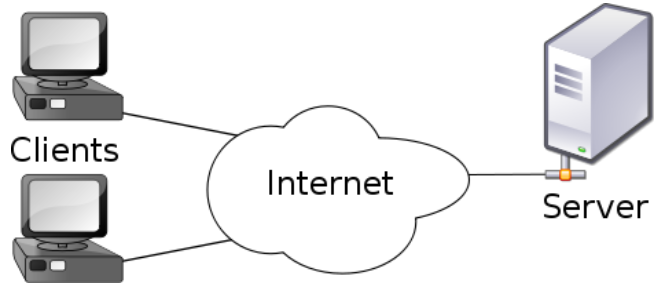

Мы намерено опустим тонкости передачи запросов и их путешествия по сети, но некоторых моментов всё же стоит коснуться.


## Как клиент понимает, куда отправлять запрос?

Для этого у каждого сервера существует свой адрес. На более низком уровне он представлен **IP адресом** формата `0-255:0-255:0-255:0-255`, а на более высоком в виде **URL** (**U**niform **R**esource **L**ocator) с которым вы все хорошо знакомы, это тот самый адрес в *адресной* строке браузера и ссылки, которые вы куда то или кому то кидаете.

Про формат URL неплохо написано в википедии, но далее мы это разберём более подробно https://ru.wikipedia.org/wiki/URL#Структура_URL

Зная URL сервера, мы, как клиент, можем отправить ему запрос и получить ответ. Давайте разберём из чего состоит и то, и другое

## Структура HTTP запроса


HTTP запрос представляет из себя самый обычный текст, но в этом тексте обязаны находится характерные для всех HTTP запросов элементы:
1. Стартовая строка. Она содержит:
    + Метод запроса (GET, POST, PUT etc.)
    + Адрес (URL)
    + Версию протокола
2. Заголовки
3. Тело запроса (опционально)


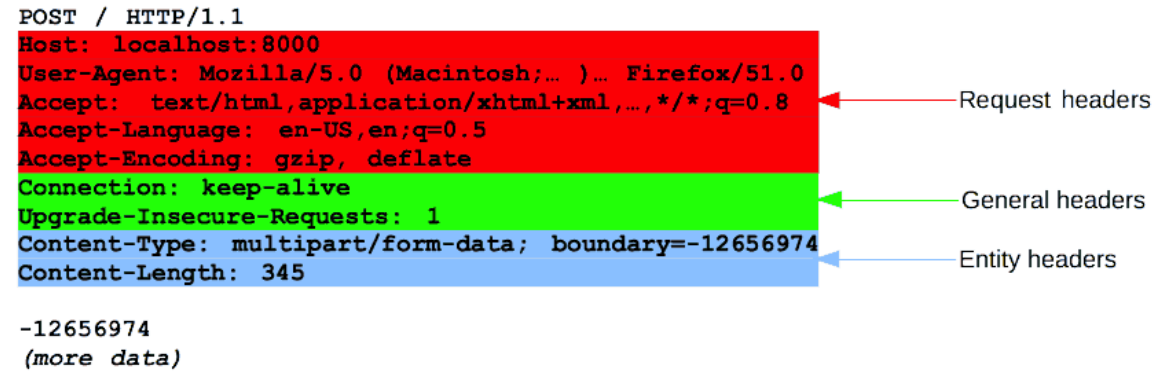


### Методы запроса

**Метод** запроса &mdash; это указание серверу на тип действия, которое он должен выполнить. Сервер может интерпретировать методы, как пожелает, но существуют некоторые конвенции по их использованию. Рассмотрим самые основные

#### GET

Метод HTTP запроса `GET` зачастую служит для **получения** каких-то **данных с сервера**, самый банальный пример &mdash; запрос на загрузку веб-странички

#### POST

Метод HTTP запроса `POST` служит для **отправки** каких-то **пользовательских данных на сервер**. Например, загрузка картинки на сайт, с очень большой вероятностью при выполнении этого действия происходит именно `POST` запрос.

**На этом хватит, остальные методы используются реже и скорее всего вам не понадобятся, но ещё есть `PUT`, `HEAD`, `OPTIONS`, `DELETE`, `PATCH` ...**


### Заголовки запроса

**Заголовки (headers)** &mdash; это часть запроса, несущая различную вспомогательную информацию в формате `key: value` и занимает строки, начиная со второй.

Существует большое количество конвенциональных заголовков, которые могут распознавать большинство серверов, но также никто не запрещает вам создавать свои собственные заголовки. Правда в таком случае нет никаких гарантий, что сервер сможет это как-то обработать.

Заголовков внутри запроса может быть любое количество


Зачастую нам не нужно вручную редактировать заголовки или разбираться в том, что в них содержится. По большей части это служебная информация, необходимая клиенту и серверу, но не пользователю. Тем не менее можно выделить несколько из них для примера:
1. **User-Agent** указывает информацию о клиенте. Чаще всего, это тип и версия веб-браузера (если вы делаете запрос из браузера, так как браузер это и есть клиент). Этот заголовок можно подменивать, чтобы обмануть сервер, заставив его думать, что к нему подключаются разные клиенты.
2. **Host** показывает адрес клиента, который выполняет запрос
3. **Content-Type** показывает тип данных в теле запроса
4. **Content-Length** показывает длину тела запроса (в байтах)


### Тело запроса


**Тело запроса** содержит в себе данные, которые клиент хочет передать серверу. Это может быть что угодно, при этом для разных типов данных в заголовок **Content-Type** указывается соответствующий тип. Бывают следующие основные типы данных в теле запроса:
1. `text/html` - HTML страница
2. `text/plain` - самый обычный текст
3. `multipart/form-data` - данные из отправленных форм
4. `image/png` - картинка в формате PNG
5. `application/json` - данные в формате JSON
6. [и ещё очень много других...](https://www.geeksforgeeks.org/http-headers-content-type/)

Все перечисленные составные части запросов можно буквально печатать своими руками в текстовом редакторе, а затем отправлять на сервер. Но, понятное дело, что так никто не делает, большую часть работы на себя берёт клиент

## Структура HTTP ответа

Когда сервер получит запрос от клиента и обработает его, он отправит обратно **ответ**.

HTTP ответ очень похож на запрос, он также представлен самым обычным текстом и содержит очень похожие элементы:
1. Строка статуса. Она содержит:
    + Версию протокола
    + Статус-код
    + Поясняющую фразу    
2. Заголовки
3. Тело запроса (опционально)

Как мы видим, это мало чем отличается от запроса.

Ну ок, с заголовками и телом всё понятно, тут всё также как и с запросами, есть конвенциональные заголовки, могут быть специальные, в теле ответа может быть что угодно. Сосредоточим внимание на первой строке

### Статус-коды

Помимо версии протокола, первая строка также содержит так называемый **статус-код**. Это трёхзначное число, которое показывает, как сервер отреагировал на запрос. Также строка содержит короткую поясняющую фразу, которая пытается объяснить этот статус-код

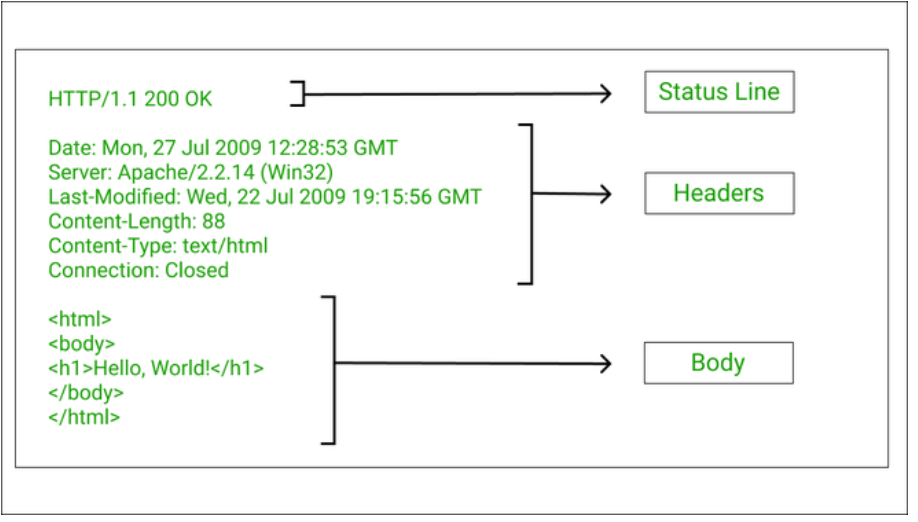

Статус-кодов существует очень много и очень полезно уметь их читать, а также наизусть помнить самые важные из них. Это может слегка облегчить жизнь даже вне контекста программирования


Статус-коды делятся на пять типов по их первой цифре, а также на подтипы по оставшимся цифрам:
1. **1xx - информационные (informational)**. Название говорит само за себя. Такие коды присутствуют у ответов, когда сервер просто хочет нам что-то сообщить (например, что он успешно получил запрос). Данные коды встречаются довольно редко
2. **2xx - успешные (success)**. Данные коды обозначают, что запрос прошёл успешно и мы получили от сервера то, что мы хотели
    + **<ins>200 OK</ins>** &mdash; это самый успешный успех, который только можно представить. Это значит, что клиент успешно сделал запрос и получил желаемый результат
    + **201 Created** &mdash; запрос оказался успешным и привёл к созданию нового ресурса
    + **204 No Content** &mdash; запрос прошёл успешно, но серверу нечего нам вернуть
3. **3xx - перенаправление (redirect)**. Такой код обозначает, что желаемый ресурс по указанному адресу не найден, но найден в другом месте. В заголовках таких ответов обычно содержится адрес по которому нужно сделать новый запрос. То есть данный код встречается, когда сервер перенаправляет нас по другому адресу
    + **301 Moved Permanently** - ресурс перемещён на другой адрес навсегда
    + **302 Found** - ресурс перемещён на другой адрес временно
4. **4xx - клиентские ошибки (client error)**. Данный код показывает, что в запросе клиента присутствует ошибка или не хватает информации
    + **<ins>400 Bad Request</ins>** - некорректный запрос, например, с нарушенной структурой (без метода или критически важного заголовка)
    + **<ins>403 Forbidden</ins>** - нет доступа (пример ниже - попытка перейти по ссылке на закрытый курс на степике)
    + **<ins>404 Not Found</ins>** - запрашиваемый ресурс не найден
5. **5xx - серверные ошибки (server error)**. Данный код показывает, что сервер не смог обработать запрос.

Полный список [здесь](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%BA%D0%BE%D0%B4%D0%BE%D0%B2_%D1%81%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F_HTTP)


Знать все коды наизусть конечно же не надо, но надо обязательно знать типы кодов и что они значат (первая цифра), а также крайне рекомендую запомнить подчёркнутые коды, они встречаются довольно часто.

Из этого списка вытекает одно очень полезное жизненное правило: **если код 4xx, то это ваш косяк** и стоит попытаться его исправить, **если код 5xx, то это косяк сервера**, вы не сможете ему помочь, здесь можно только надеятся и верить, что его починят, не тратьте время на выяснение причины проблемы в таких случаях


Пример кода **403**. Вы не поступили на закрытый курс, значит доступ к нему для вас запрещён (**Forbidden**)

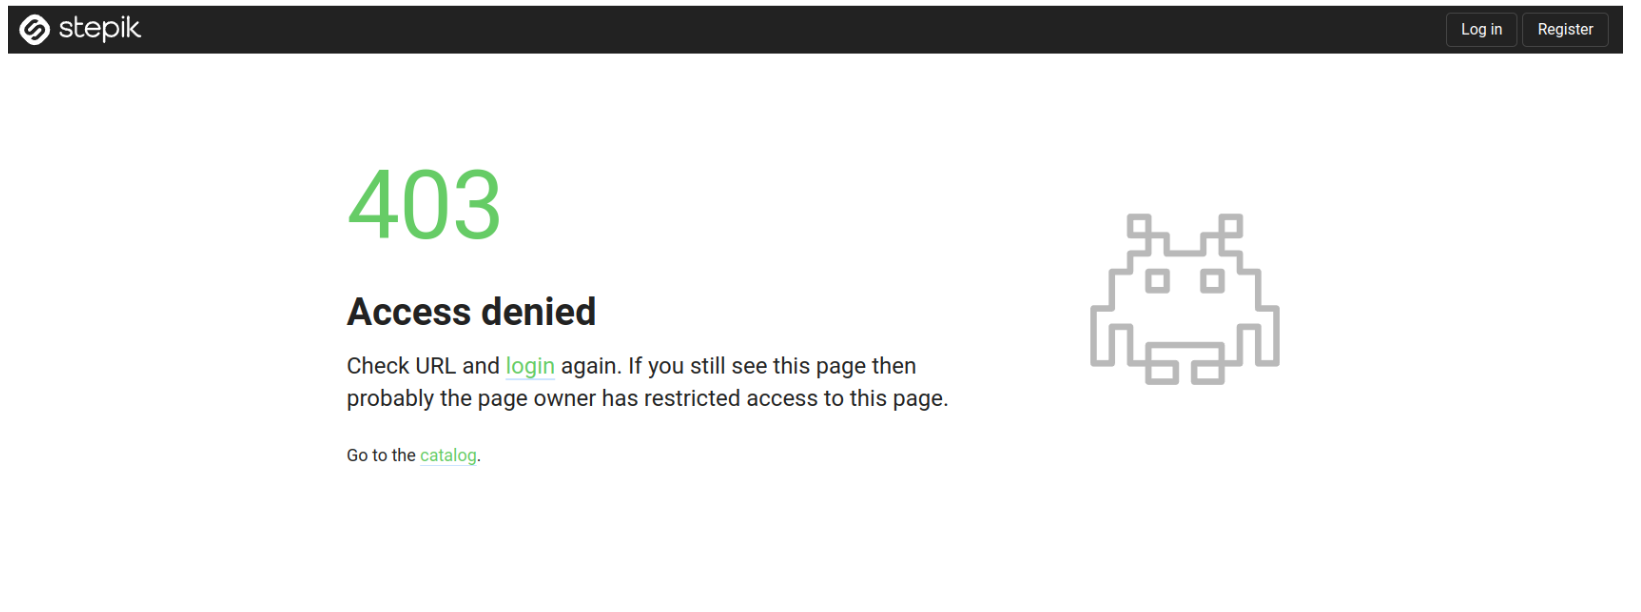

## Подробнее про GET запросы и структуру URL

URL в общем виде выглядит вот так (здесь нет некоторых элементов, но это не критично)

`https://stepik.org/lesson/779029/step/1?unit=781553`

Разберём его на составляющие

#### Схема
1. `https` - это **протокол**, который используется для запроса (строго говоря, это назывется *схема*, но зачастую она обозначает именно протокол)

#### Хост
2. `stepik.org` - **хост (host)**, это человекочитаемое имя сайта. Специальные ДНС сервера позволяют нам по имени хоста получить IP адрес сервера (но это уже детали). Вместо хоста также вполне легально использовать IP адрес.
    + `org` - домен верхнего уровня, так же как `com`, `ru` и др. Вам не нужно знать в деталях что это, просто запомните название.
    + Также существуют ещё и домены нижних уровней, они пишутся в начале имени хоста через точку (в данном примере их нет, но можно взять `https://ru.wikipedia.org/wiki/URL`. Здесь домен верхнего уровня это `org`, а нижнего `ru`). Доменов нижних уровней может быть сколько угодно.
    
#### Путь
3. `/lesson/779029/step/1` - **путь (path)**. Хоть это и называется "путь", эта строка не является непосредственным путём в файловой системе на сервере. Сервер может проанализировать данную строку и на основании этого выдать определённый ответ. Пути не всегда отражают иерархию страниц на сайте, как это может иногда показаться. При этом легко убедиться, что сервер решает, какой именно ответ нам выдать, в том числе в зависимости от пути. Для этого перейдите по оригинальной ссылке, а затем замените в адресной строке `lesson/779029/step/1` на `lesson/779029/step/2` и вы "магическим" образом окажетесь на странице следующего шага. Как вы видите, всё довольно логично, и по URL вполне можно догадаться за что отвечают отдельные элементы пути и изменять их в зависимости от своих нужд. Однако это работает не всегда. Например, можно догадаться, что `779029` это некий ID урока на степике, но так как это число сильно больше, чем количество уроков в любом курсе, мы можем понять, что это некоторое абсолютное значение и не факт, что путь `/lesson/779030/step/1` приведёт нас на другой урок этого же курса.

#### Query string

<a href="#querystring"></a>


4. `?unit=781553` - это самое интересное. Данная штука называется **query string (строка параметров)**.

В ней записаны дополнительные параметры запроса, которые будут переданы серверу в формате `?key_1=value_1&key_2=value_2&key_3=value_3`. В случае этого URL не совсем понятно, что это, поэтому рассмотрим на другом примере

`https://translate.google.ru/?hl=ru&tab=rT&sl=ru&tl=en&op=translate`

Здесь этих параметров довольно много. По уже имеющимся значениям мы можем выяснить за что каждый из них отвечает и на основании этого, попробовать другие варианты.

Например, очевидно, что ключи `hl`, `sl`, `en` соответствуют каким-то языкам. Попробуйте сами поменять значения для этих ключей на аббревиатуры каких либо ещё языков.

На этом моменте вы уже должны были почувствовать себя хакером

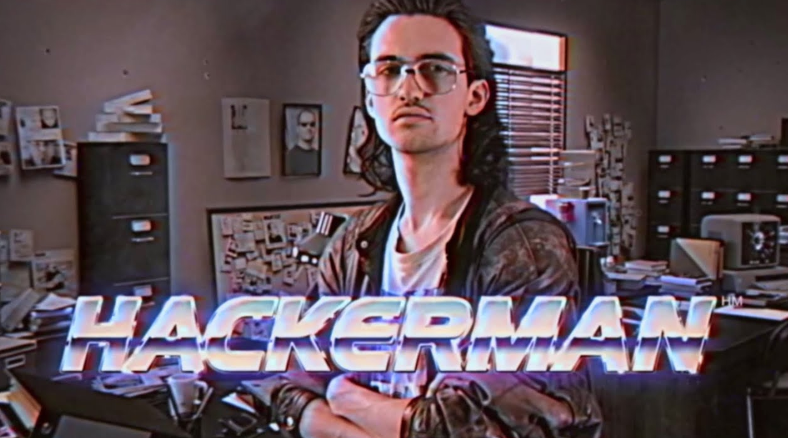

Таким образом, query string позволяет передавать серверу вместе с запросом произвольные параметры в формате ключ-значение, это довольно удобный инструмент.

Важно также заметить, что query string используется в основном только с GET запросами, поэтому если вы находитесь на какой-то странице и видите query string, то с большой вероятностью вы оказались здесь при помощи GET запроса.

Теперь вы умеете изменять поведение запросов, вручную анализируя и редактируя URL

## Веб страницы

Самое частое с чем мы сталкиваемся в интернете и, что содержит большую часть информации, это веб страницы.

Веб-страницы это ни что иное, как самый обычный текстовый документ, который нам отправляет сервер в ответ на наш запрос. Браузер же умеет работать с такими документами и отображает нам красивую страничку. Большинство веб страниц существует в специальном текстовом формате [HTML](https://en.wikipedia.org/wiki/HTML)

### HTML

Формат HTML (**H**yper**T**ext **M**arkup **L**anguage) это текстовый формат (то есть его можно открыть в обычном текстовом редакторе) с особой структурой. Весь HTML документ состоит из набора вложенных друг в друга **элементов**.

**Элементы** в свою очередь образуются при помощи **тэгов**

**Тэг** - это специальный модификатор, который обозначается знаками `<>`. Тэги бывают **октрывающие** (`<tag_name>`) и **закрывающие** (`</tag_name>`). **Элемент** образуется открывающим и закрывающим тэгами, а также контентом между ними

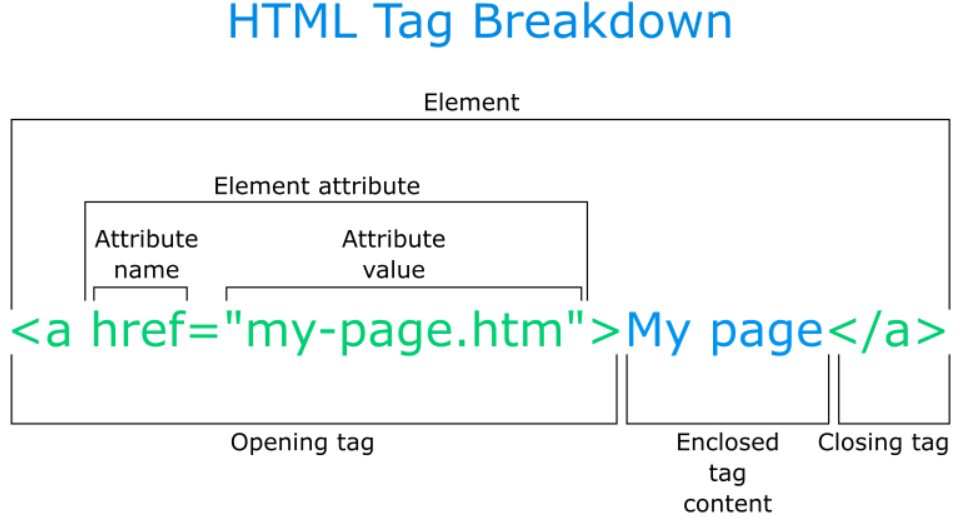

Различные элементы, как правило, влияют на форматирование страницы. Браузер прекрасно понимает HTML и отображает элементы согласно их тегам. Например, тег `<b></b>` способен сделать текст, находящийся между открывающим и закрывающим тэгами **жирным**.

Тэгов существует [очень много](https://www.w3schools.com/TAGS/default.asp). Например, бывают элементы, не требующие закрывающего тега. Бывают элементы внутри которых можно писать текст, а бывают в которых нельзя.

Ещё на картинке выше мы видим, что у элементов бывают **атрибуты**. Это специальные модификаторы в формате `key=value`, которые указываются внутри открывающего тега, они могут влиять на поведение и отображение элемента

Кстати, HTML также поддерживается Markdown ячейками в jupyter notebook, поэтому вы можете посмотреть, что за тэги стоят за примерами ниже, раскрыв содержимое этой ячейки для редактирования

<b>This text is bold</b>

<i>This text is bold</i>

<a href="https://en.wikipedia.org/wiki/HTML">This is link</a>

<div style="text-align: center">This text is centered</div>

<div style="color: red">This text is red</div>


<div style="border: 2px solid red; padding: 10px;">
  <div style="border: 2px solid blue; padding: 10px;">
    <p>This is a nested element with a blue border.</p>
  </div>
  <div style="border: 2px solid green; padding: 10px;">
    <p>This is another nested element with a green border.</p>
  </div>
</div>


В примере выше вы также можете видеть, что элементы можно вкладывать друг в друга (вставить элемент между открывающим и закрывающим тегом другого элемента), тем самым создавая вложенную структуру.

На данном этапе **нам не нужно уметь писать HTML-код**, но **нужно уметь его читать и примерно понимать**, что из себя представляют основные элементы, а также знать несколько важных тегов.


Вот, например, маленький кусочек кода страницы репозитория на GitHub. Это примерно 1.6% от всего содержимого страницы. В браузере Chrome HTML код любой страницы можно просмотреть при помощи `ПКМ -> View page source` или `Ctrl+U`

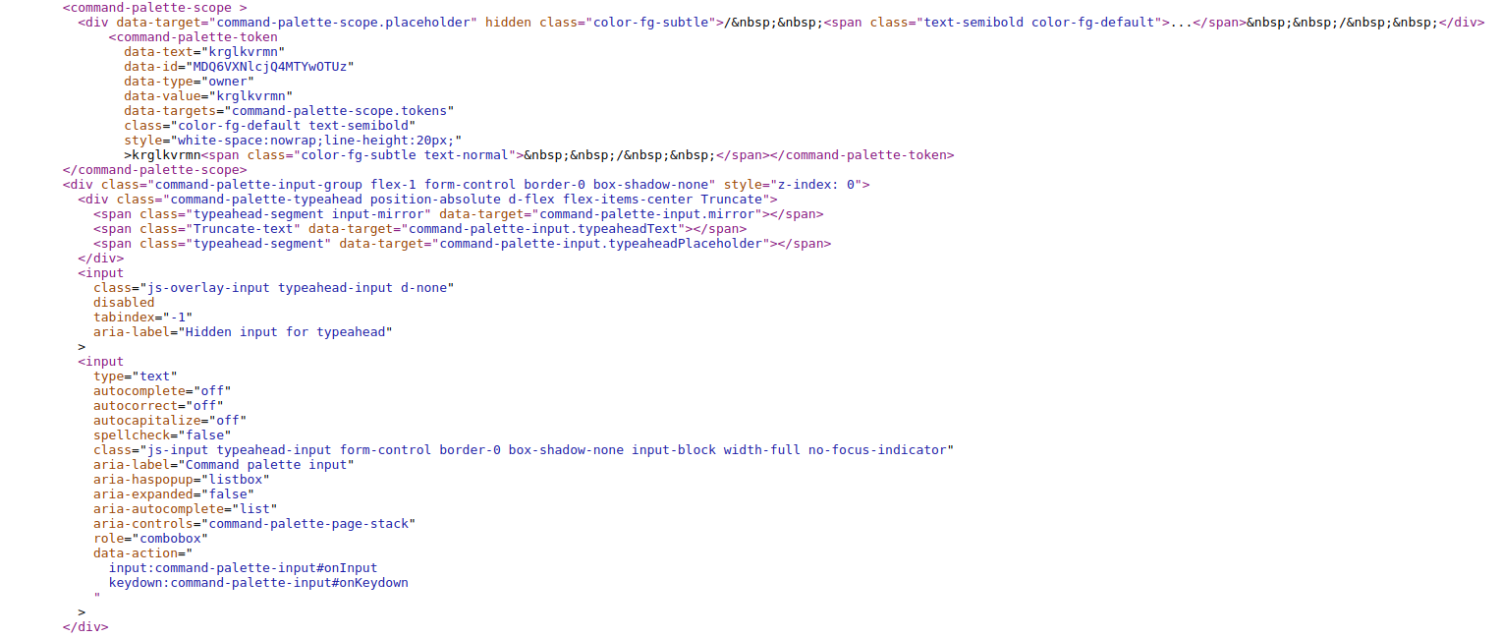

### Chrome developer tools

В разы более удобный способ изучения HTML кода страницы предоставляется "инструментами для разработчика" в Chrome (в других браузерах есть свои аналоги). Данное меню можно открыть при помощи `ПКМ -> Inspect` или `Ctrl+Shift+C`. Это мощнейший инструмент, который мы будем активно использовать.

По-умолчанию при открытии этого меню мы попадаем на вкладку *Elements*, которая в удобном виде отображает **элементы** HTML страницы во вложенном виде. Элементы можно раскрывать и сворачивать по щелчку мыши. Что ещё более удобно, при наведении на элемент в панели справа, на самой странице подсвечивается участок, который соответствует данному элементу. Благодаря этой фиче можно быстро находить элементы, которые соответствуют интересующему нас контенту на странице

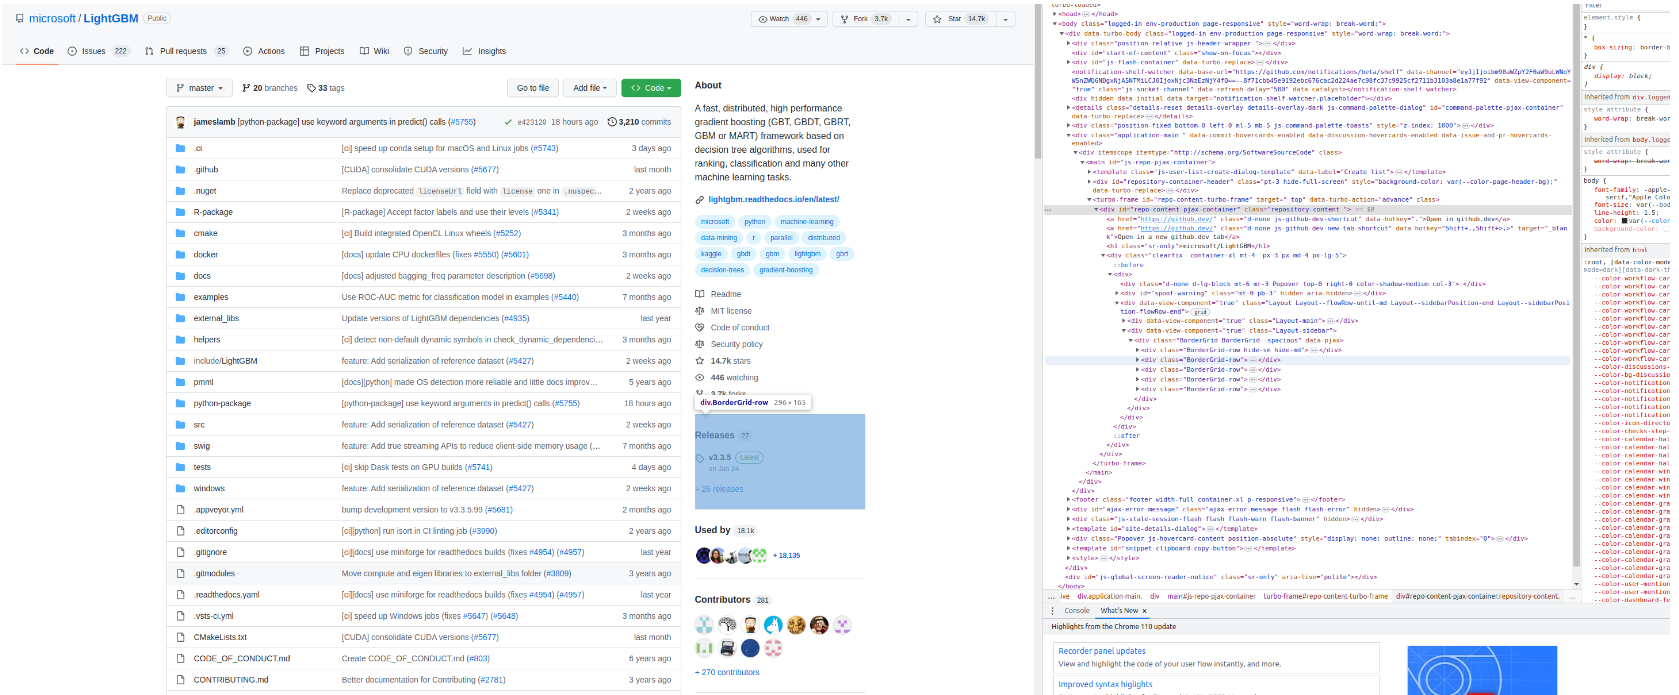


Для примера, давайте попробуем найти HTML код, который ответственен за отображение кнопки `Pull requests`. Для этого мы будем постепенно раскрывать элементы на панели справа, пока не найдём тот, при наведении на который данная кнопка подсветится. Поскольку элементы на странице вложены друг в друга, поиск сильно облегчается (на картинке мы нашли элемент, который **включает в себя** элемент с кнопкой `Pull requests`, значит искать дальше можно только внутри него)

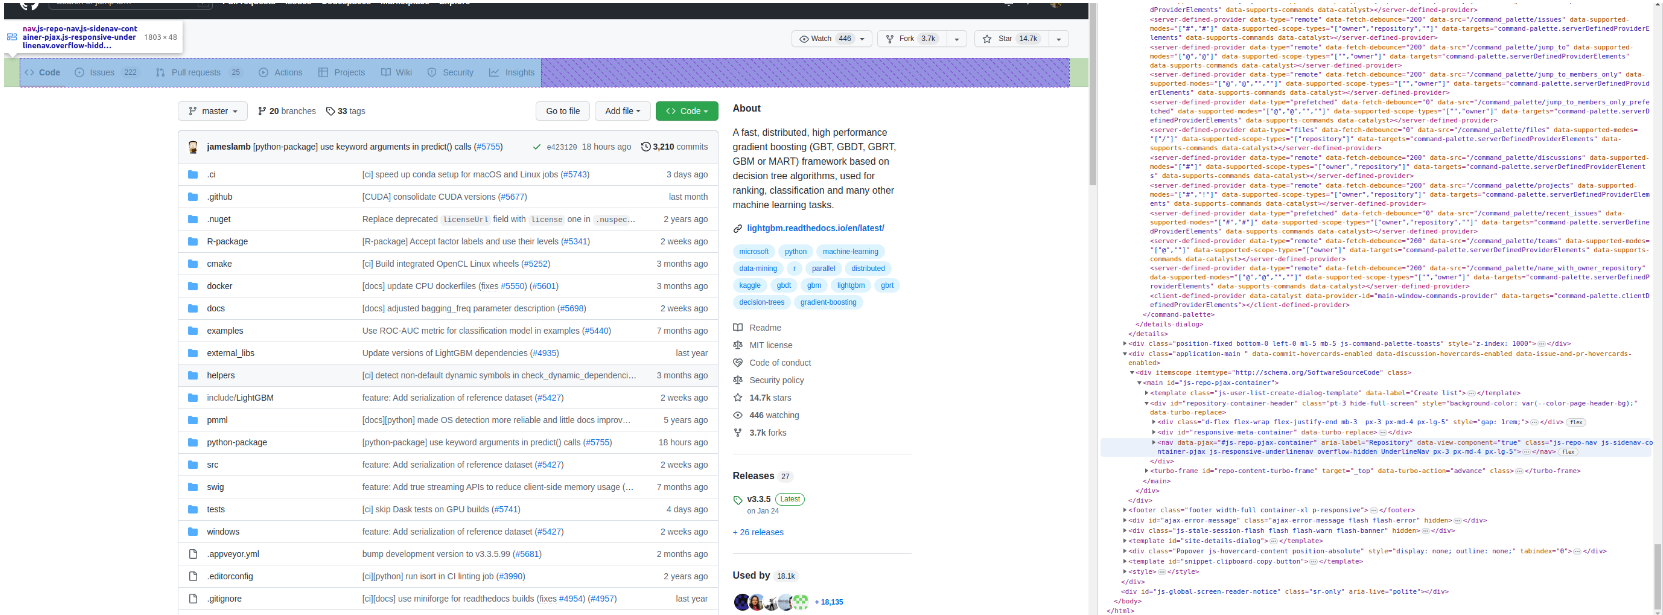


В конце концов мы находим нужный элемент и видим, что он состоит из ряда более маленьких:
1. `li` (list item) - элемент списка
2. `a` - ссылка
3. `svg` - векторная картинка
4. `span` - inline контейнер, мы видим, что в нём как раз и находится текст *Pull requests*

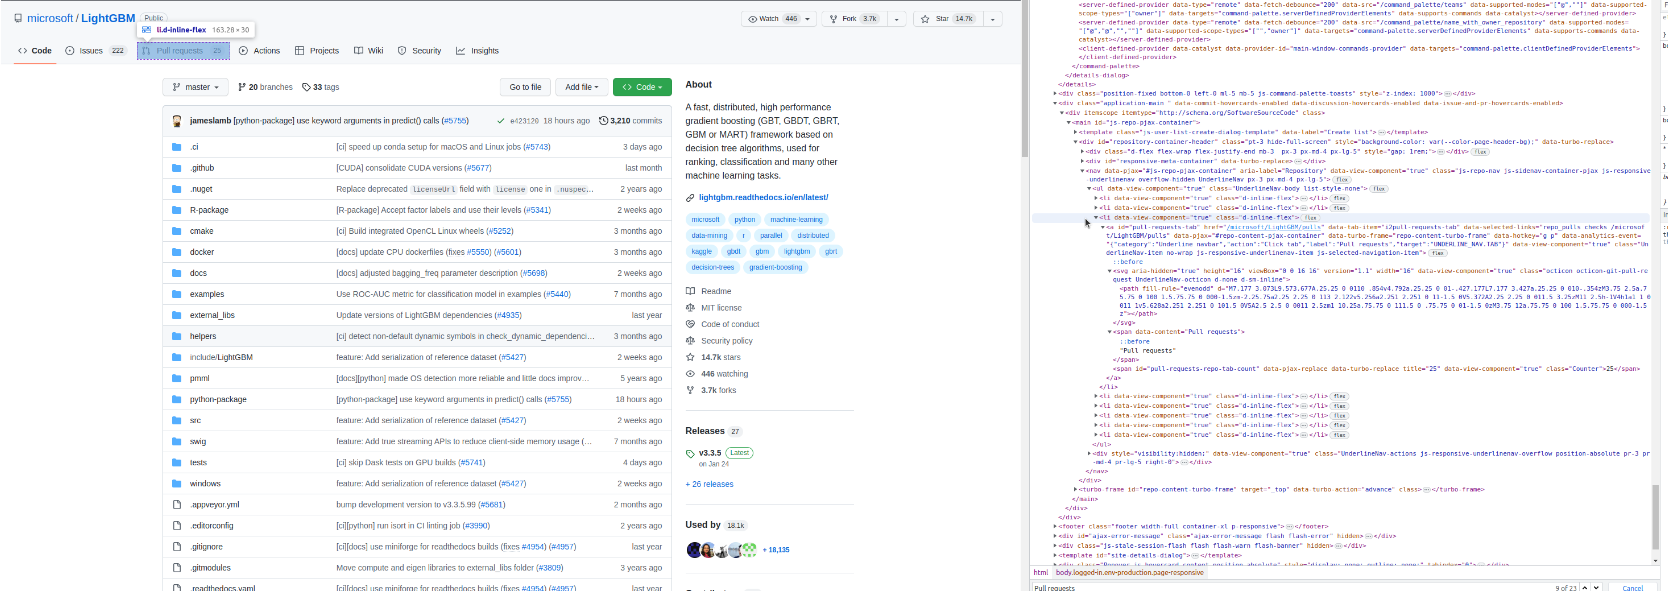

Процесс поиска можно ускорить, открывая меню разработчика после клика ПКМ сразу по нужному элементу, но это работает не всегда. 

HTML код хранит в себе всё содержимое страницы и даже больше. Позже мы научимся получать 
код из питона и **парсить** его с целью получения полезной информации

# Взаимодействие с интернетом через Python

Базу по интернету мы разобрали, а значит пора выяснить, как работать с интернетом через Python

Для этого в питоне есть разные библиотеки, самые часто используемые это `urllib3` (включена в состав стандартной библиотеки питона) и `requests` (нужно устанавливать). В данном курсе мы будем рассматривать именно `requests`, так как она более высокоуровневая и простая в освоении и использовании. Тем не менее сначала нужно также разобраться с одной технологией, имеющей отношение к интернету

## Формат JSON

**JSON** (**J**ava**S**cript **O**bject **N**otation) это очень важный и популярный **текстовый** формат данных, который используется для хранения данных в виде ключ-значение. Он часто используется в интернете в теле HTTP запросов и ответов для общения клиента и сервера, но также широко используется и без применения к интернету.

Посмотрим на то, как выглядит формат JSON


```json
{
  "string": "Hello, world!",
  "number": 1234.56,
  "boolean": true,
  "null_value": null,
  "array": [
    "apple",
    "banana",
    "orange"
  ],
  "object": {
    "key1": "value1",
    "key2": "value2",
    "key3": {
      "nested_key1": "nested_value1",
      "nested_key2": "nested_value2"
    }
  }
}
```


JSON очень сильно похож на то, как устроены словари в питоне, но тем не менее, JSON объект зачастую не получится вставить напрямую в Python код и наоборот, так как некоторые различия всё-таки имеются:
1. Синтаксис JSON в целом более строгий, чем у питоновских словарей. Например, **в JSON нельзя использовать одинарные кавычки `'`, только двойные `"`**
2. **JSON имеет ограниченный набор данных, которые он умеет хранить**. Это строки, числа, логический тип, массивы, объекты и null

На самом деле JSON (как видно по расшифровке данной аббревиатуры) это один из способов создания **объектов** в JavaScript. Более того, в JavaScript и нет словарей в привычном нам виде, вместо них там используются эти объекты, которые создаются при помощи вот такого синтаксиса

Рассмотрим, что есть в формате JSON:
1. Фигурные скобки обозначают **объект** `{}`. Объект это набор пар ключ-значение.
2. Квадратные скобки обозначают **массив (array)** `[]`. Это упорядоченная последовательность значений или объектов
3. Есть непосредственно **значения**. Это могут быть **строки, числа, логический тип, массивы, объекты и null**. Запись значений логического типа отличается от питона (`true` и `false`, с маленькой буквы) и есть специальное значение `null` (это что-то вроде питоновского `None`)

Вложенность JSON может быть сколько угодно большой, перечисленные ранее значения можно комбинировать, как вам захочется

### Модуль json в Python

Так как мы работаем в Python, то мы хотим уметь **парсить** JSON формат для использования данных в нашем коде. Не трудно догадаться, что наша задача &mdash; сделать из JSON словарь.

Для этого в питоне все используют модуль `json` (из стандартной библиотеки) или `ujson` (более быстрый, но нужно устанавливать отдельно) 

In [1]:
import json

В модуле `json` нам интересны всего четыре функции:
1. `json.dump` &mdash; сохраняет словарь в **файл** в формате JSON
2. `json.dumps` &mdash; сохраняет словарь в **строку** в формате JSON. Это легко запомнить в таком виде `json.dumps`tring
3. `json.load` &mdash; парсит JSON **файл** и сохраняет результат в словарь
4. `json.loads` &mdash; парсит JSON **строку** и сохраняет результат в словарь. Это легко запомнить в таком виде `json.loads`tring

Проверим данные функции, используя пример формата выше

#### `json.loads`

Обе `json.loads` принимает один основной аргумент &mdash; строку в формате JSON

In [2]:
json_string = """
{
  "string": "Hello, world!",
  "number": 1234.56,
  "boolean": true,
  "null_value": null,
  "array": [
    "apple",
    "banana",
    "orange"
  ],
  "object": {
    "key1": "value1",
    "key2": "value2",
    "key3": {
      "nested_key1": "nested_value1",
      "nested_key2": "nested_value2"
    }
  }
}
"""

python_dict = json.loads(json_string)
python_dict

{'string': 'Hello, world!',
 'number': 1234.56,
 'boolean': True,
 'null_value': None,
 'array': ['apple', 'banana', 'orange'],
 'object': {'key1': 'value1',
  'key2': 'value2',
  'key3': {'nested_key1': 'nested_value1', 'nested_key2': 'nested_value2'}}}

Всё сработало, кроме того, мы видим, что `null` стал `None`, а `true` стала `True`, так как мы теперь в питоне

#### `json.dump`

`json.dump` принимает два основных аргумента:
1. Словарь, который мы хотим сохранить в JSON файл
2. Объект файла, в который мы хотим сохранить словарь

In [3]:
with open("example.json", "w") as file:
    json.dump(python_dict, file)

Код выполнился, можете открыть файл и посмотреть на содержимое

#### `json.load`

Теперь мы снова распарсим JSON, но на этот раз из получившегося в результате работы предыдущего кода **файла**

`json.load` принимает один основной аргумент &mdash; объект файла, который нужно распарсить

In [4]:
with open("example.json") as file:
    python_dict2 = json.load(file)

In [5]:
python_dict2 == python_dict   # Как мы видим, считывание из строки и файла даёт одинаковый результат

True

#### `json.dumps`

Обе `json.dumps` принимает один основной аргумент &mdash; питоновский словарь

In [6]:
json_string = json.dumps(python_dict2)
json_string

'{"string": "Hello, world!", "number": 1234.56, "boolean": true, "null_value": null, "array": ["apple", "banana", "orange"], "object": {"key1": "value1", "key2": "value2", "key3": {"nested_key1": "nested_value1", "nested_key2": "nested_value2"}}}'

Вот и всё, данный формат очень простой и с ним удобно работать. В жизни, если вы будете встречать формат JSON, а вы точно будете, вам будут попадаться огромные объекты, которые крайне трудно считывать визуально. Для этого на помощь вам приходя программы/сайты просмотрщики JSON файлов. Я, например, пользуюсь вот этим http://jsonviewer.stack.hu/. При копировании туда JSON текста он выдаёт вот такую интерактивную штуку

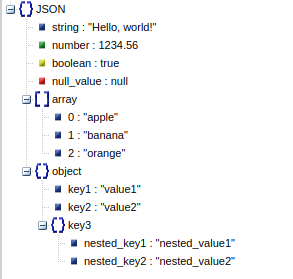

## Библиотека **requests**

Данная библиотека, как следует из названия, позволяет нам отправлять HTTP запросы (ок, про HTTP из названия не следует, но вы поняли). Делается это очень просто

In [17]:
import requests

### Как делать простые запросы

In [18]:
requests.get("https://google.com")

<Response [200]>

### Объект `Response`

Результатом выполнения функций `requests.<method>` является объект ответа (`Response`). Из него мы в дальнейшем будем получать все интересующие нас данные

In [19]:
response = requests.get("https://google.com")
type(response)

requests.models.Response

Например, мы можем узнать статус-код ответа при помощи атрибута `status_code`. В нашем случае код 200, всё прошло успешно

In [20]:
response.status_code

200

Мы можем сделать несуществующий URL и получить статус-код 404, исключения в питоне при этом не выбрасывается

In [21]:
response = requests.get("https://google.com/some/path/that/does/not/exist")  
response.status_code

404

Но если неправильно написать имя хоста, то исключение всё-таки будет. Это происходит из-за того, что в коде выше запрос **успешно доходит** до сервера Google (так как имя хоста мы указали верно), но этот сервер не знает как обработать путь `some/path/that/does/not/exist`, поэтому он говорит нам, что такого ресурса нет. То есть сервер присылает нам обратно ответ с кодом **404**. Код ниже кидает исключение, так как имя хоста написано неверно, а значит наш запрос впринципе не может добраться до сервера Google, а значит ответ прислать тоже некому

In [22]:
response = requests.get("https://google.commm")  

ConnectionError: HTTPSConnectionPool(host='google.commm', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7fab227b3c20>: Failed to resolve 'google.commm' ([Errno -2] Name or service not known)"))

In [23]:
response

<Response [404]>

Из ответа можно получить заголовки в виде словаря при помощи атрибута `headers`, что довольно удобно

In [15]:
response = requests.get("https://google.com")
response.headers

{'Date': 'Sat, 10 Feb 2024 10:12:48 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-vLWuuda5MeZK0xfDX0xGlw' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2024-02-10-10; expires=Mon, 11-Mar-2024 10:12:48 GMT; path=/; domain=.google.com; Secure, AEC=Ae3NU9PaCA2h3Uwmna96gjZurqF-MuA5rV8oBZpM9SZfwMgvR_dP4Z51xPA; expires=Thu, 08-Aug-2024 10:12:48 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=hGLqRGygGD9dlaWiwy70ze_GBugYAYhPYbtMn1dirIT8TRnyvzMGpxYcSL4eFOK34MN1gXZXUUH8RLx21ZYlVC66ulaT3jLQPVzIAbBJN_y7KvI2WgdGsEozc7vDdbAym1hNAkDbzUSq3FIp

Но самое интересное для нас это атрибуты, которые позволяют работать с телом запроса:
1. `text` &mdash; тело ответа в текстовом виде. Альтернативно можно использовать итератор `.iter_lines()`
2. `content` &mdash; тело ответа в бинарном виде. Альтернативно можно использовать итератор `.iter_content()`
3. `json()` &mdash; возвращает словарь, если тело ответа в JSON формате 

In [16]:
response = requests.get("https://google.com")
response.text    # В большинстве случаев, в атрибуте text мы увидим HTML код страницы

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ru"><head><meta content="&#1055;&#1086;&#1080;&#1089;&#1082; &#1080;&#1085;&#1092;&#1086;&#1088;&#1084;&#1072;&#1094;&#1080;&#1080; &#1074; &#1080;&#1085;&#1090;&#1077;&#1088;&#1085;&#1077;&#1090;&#1077;: &#1074;&#1077;&#1073; &#1089;&#1090;&#1088;&#1072;&#1085;&#1080;&#1094;&#1099;, &#1082;&#1072;&#1088;&#1090;&#1080;&#1085;&#1082;&#1080;, &#1074;&#1080;&#1076;&#1077;&#1086; &#1080; &#1084;&#1085;&#1086;&#1075;&#1086;&#1077; &#1076;&#1088;&#1091;&#1075;&#1086;&#1077;." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="WlxKW2KagXXlJEbbOuFWUQ">(function(){var _g={kEI:\'IEzHZazYKYulwPAPyJai4Ag\',kEXPI:\'0,1356780,8687,207,4804,1132070,1962,868575,327238,967,379749,44798,23792,12311,2824,14764,4998,17075,38444,287

URL может быть представлен в виде прямой ссылки на файл (не обязательно являющийся HTML страницей). В таком случае в `text` мы увидим содержимое файла

In [17]:
response = requests.get("https://raw.githubusercontent.com/psf/requests/main/README.md")
print(response.text)   # README.md из репозитория на GitHub

# Requests

**Requests** is a simple, yet elegant, HTTP library.

```python
>>> import requests
>>> r = requests.get('https://httpbin.org/basic-auth/user/pass', auth=('user', 'pass'))
>>> r.status_code
200
>>> r.headers['content-type']
'application/json; charset=utf8'
>>> r.encoding
'utf-8'
>>> r.text
'{"authenticated": true, ...'
>>> r.json()
{'authenticated': True, ...}
```

Requests allows you to send HTTP/1.1 requests extremely easily. There’s no need to manually add query strings to your URLs, or to form-encode your `PUT` & `POST` data — but nowadays, just use the `json` method!

Requests is one of the most downloaded Python packages today, pulling in around `30M downloads / week`— according to GitHub, Requests is currently [depended upon](https://github.com/psf/requests/network/dependents?package_id=UGFja2FnZS01NzA4OTExNg%3D%3D) by `1,000,000+` repositories. You may certainly put your trust in this code.

[![Downloads](https://static.pepy.tech/badge/requests/month)](https://pepy.

Про метод `.json()` мы поговорим позже

### Работа с query string

Мы знаем, что с GET запросами можно также передавать данные в формате ключ-значение. Это делается при помощи **query string**.

Рассмотрим это на примере страницы с информацией о геноме *E.coli* с NCBI &mdash; `https://www.ncbi.nlm.nih.gov/genome/?term=Escherichia+coli`

Модуль `requests` позволяет нам оперировать параметрами из query sting двумя способами. Первый &mdash; просто включить query string в состав URL

In [18]:
response1 = requests.get("https://www.ncbi.nlm.nih.gov/genome/?term=Escherichia+coli")   # Это работает!!!
response1

<Response [200]>

Второй способ &mdash; передать функции для выполнения запроса словарь с параметрами при помощи аргумента `params`. При этом query string указывать в URL уже не нужно, а в процессе выполнения запроса библиотека сама составит query string из переданных параметров и сама подставит её в URL

In [19]:
response2 = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": "Escherichia+coli"})   # Это тоже работает
response2

<Response [200]>

Кстати, `+` и пробел в данной ситуации равнозначны, поэтому вот такая штука тоже будет работать

In [20]:
response3 = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": "Escherichia coli"})   # Это тоже работает
response3

<Response [200]>

### Аргументы POST запросов

Ненадолго отступим от темы, чтобы разобрать, как делаются POST запросы. POST запросы в отличии от GET часто несут какую-то полезную нагрузку (**payload**) в своём теле. Передача данных в POST запросе немного отличается от работы с query string

In [21]:
with open("Lecture_19_20_Internet.ipynb", "rb") as file:
    response = requests.post("https://www.ncbi.nlm.nih.gov/genome", params={"key": "value"},
                                                                    data={"data_key1": "data_value1"},
                                                                    json={"json_key1": ["json_value1", "json_value2"]},
                                                                    files={"file1": file})

В запросе выше печечислены все основные аргументы POST запроса в requests. NCBI скорее всего не сможет это обработать, но нам сейчас это и не нужно. Также все эти элементы редко комбинируются вместе

1. `params` это параметры для query string, с POST запросами так тоже можно, хоть и делается более редко
2. `data` это данные в формате ключ-значение, отличается от query string тем, что используется при отправке форм (про это будет отдельная лекция)
3. `json` - если мы хотим отправить данные в формате JSON, можно передать словарь
4. `files` - словарь с файлами, которые мы хотим отправить. **Файлы обязательно должны быть окрыты в режиме "rb"**

Через атрибут `request` объекта ответа мы можем посмотреть на то, что сформировалось и передалось на сервер после указания всех этих параметров

In [22]:
response.request.url   # Видим, что query sting составилась и корректно прикрепилась к URL

'https://www.ncbi.nlm.nih.gov/genome?key=value'

In [23]:
print(response.request.body[:1000])    # В теле запроса мы выдим особым образом записанные параметры из аргумента `data`, а также огромный пласт непонятных букв - это наш файл

b'--6285bfde5e89d560c326d5338e653008\r\nContent-Disposition: form-data; name="data_key1"\r\n\r\ndata_value1\r\n--6285bfde5e89d560c326d5338e653008\r\nContent-Disposition: form-data; name="file1"; filename="Lecture_19_20_Internet.ipynb"\r\n\r\n{\n "cells": [\n  {\n   "cell_type": "markdown",\n   "id": "8d7cf656",\n   "metadata": {},\n   "source": [\n    "# <center>  Python for biologists"\n   ]\n  },\n  {\n   "cell_type": "markdown",\n   "id": "eaad065b",\n   "metadata": {},\n   "source": [\n    "## Lectures 19 and 20, Internet\\n",\n    "09.03.2024, 16.03.2024\\n",\n    "\\n",\n    "\\n",\n    "> Nikita Vaulin, vaulin@ro.ru, tg: @nvaulin\\n",\n    "    "\n   ]\n  },\n  {\n   "cell_type": "markdown",\n   "id": "6a6150f9",\n   "metadata": {},\n   "source": [\n    "---"\n   ]\n  },\n  {\n   "attachments": {\n    "014eaeb1-9c93-4a05-9edf-23a9d3affdd7.png": {\n     "image/png": "iVBORw0KGgoAAAANSUhEUgAAApQAAAErCAYAAABguxMBAAAgAElEQVR4AeydBXhc55m2u/9id7fMW0iTYgrbdgvbdtttt03TNgyOmdmWZUaZmSl2DD

In [24]:
response.request.headers    # Это не совсем относится к теме, но здесь видно, что когда мы делаем запрос из питона, то заголовок 'User-Agent' указывает, что мы использовали requests

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '5339165', 'Content-Type': 'multipart/form-data; boundary=6285bfde5e89d560c326d5338e653008'}

### Back to query string

Уже на данном этапе для нас открываются очень широкие возможности. Например, мы можем составить **список** видов в питоне и в цикле получить соответствующие страницы из NCBI

In [25]:
species_list = ["Escherichia coli", "Homo sapiens", "Danio rerio"]
for species in species_list:
    response = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": species})
    print(response)

<Response [200]>
<Response [200]>
<Response [200]>


Круто! Но мало просто сделать удачный запрос, мы вообще то хотим получить какие-то данные из этих страниц

## "Наивный" парсинг веб страниц

На самом деле вам уже известно всё необходимое для того, чтобы вытащить из HTTP ответа нужную информацию:
1. Вы знаете, что в атрибуте `text` хранится тело ответа, представляющее из себя HTML страницу в данном случае. HTML это **текстовый формат**
2. Вы знаете, как найти, в каком именно HTML элементе хранится нужная информация
3. Вы знаете регулярные выражения, которые работают с **текстом**

Используя данные знания, попробуем вытащить со страницы каждого вида данную информацию

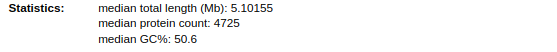

При этом нас будут интересовать только цифры

Предварительно изучим HTML код данных элементов через Chrome Developer Tools, на этот раз без скриншотов, попробуйте сами

Первым делом напишем регулярки для каждого из трёх чисел. Это будет намного проще, чем пытаться написать одну, которая сразу поймает все три значения

In [26]:
import re


total_length_pattern = re.compile(r"median total length \(Mb\)\: ([\d\.]+)")
median_protein_count_pattern = re.compile(r"median protein count\: (\d+)")
median_gc_pattern = re.compile(r"median GC%\: ([\d\.]+)")

То есть мы нашли какую-то общую закономерность в отображении этих статистик и теперь используем этот шаблон в регулярках

In [27]:
species_list = ["Escherichia coli", "Homo sapiens", "Danio rerio"]
for species in species_list:
    response = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": species})    # Делаем запрос также как и раньше
    
    total_length = float(re.search(total_length_pattern, response.text).group(1))     # Производим поиск по регулярке в атрибуте text ответа
    median_protein_count = int(re.search(median_protein_count_pattern, response.text).group(1))
    median_gc = float(re.search(median_gc_pattern, response.text).group(1))
    
    print(f"Length of {species} genome is {total_length} Mbp")
    print(f"Median number of proteins in {species} is {median_protein_count}")
    print(f"Median GC of {species} genome is {median_gc}%")
    print()

Length of Escherichia coli genome is 5.10155 Mbp
Median number of proteins in Escherichia coli is 4726
Median GC of Escherichia coli genome is 50.6%

Length of Homo sapiens genome is 2865.08 Mbp
Median number of proteins in Homo sapiens is 87306
Median GC of Homo sapiens genome is 40.4%

Length of Danio rerio genome is 1408.43 Mbp
Median number of proteins in Danio rerio is 57100
Median GC of Danio rerio genome is 36.9894%



Круто, всё получилось. При помощи питона и базовых знаний интернета мы смогли достать из веб страницы нужную нам информацию, даже если такая возможность не была продумана разработчиком сайта. При помощи такого подхода можно **парсить** любые **статичные** HTML страницы

❗Тем не менее в реальной жизни иногда всё бывает не так радужно, как в этом примере. Веб страницы бывают совершенно непредсказуемы и практически к каждой нужен свой индивидуальный подход через пробы и ошибки. [**Web scraping**](https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%B1-%D1%81%D0%BA%D1%80%D0%B5%D0%B9%D0%BF%D0%B8%D0%BD%D0%B3), как называется это занятие, это в первую очередь очень исследовательский процесс. Тем не менее, если вы своими глазами видите какую-то информацию на сайте, то в 99.99% случаев её можно достать при помощи питона, вопрос только в том, сколько усилий для этого потребуется

NCBI в этом плане довольно дружелюбный, на нём удобно практиковаться


## Библиотека beautifulsoup

Но, очевидно, что парсинг страниц через регулярные выражения это довольно непростое занятие. Ведь наверняка кто-то уже написал библиотеку, которая сильно облегчает работу? Да, это библиотека `beautifulsoup`

Библиотеку нужно установить (посмотрите как, [в документации](https://beautiful-soup-4.readthedocs.io/en/latest/)), а также она требует установить какую-нибудь библиотеку-парсер (нам не важно, что это такое), можно взять `lxml`

Здесь мы рассмотрим только самые основные возможности этой библиотеки, а они довольно широкие. Нам понадобится всего один основной класс - `BeautifulSoup`

In [28]:
import requests
from bs4 import BeautifulSoup

При помощи данного класса и текста HTML страницы мы создаём специальный объект. Я не в курсе конвенций по его названию, но я привык называть его просто **суп**.

Для создания супа передаём в конструктор класса:
1. HTML страницу, это может быть строка или файл (открытый). Также можно и нужно при возможности передавать строку в бинарном виде, в таком случае повышается вероятность корректного распознавания парсером необычных символов
2. Имя используемого парсера (в детали вникать не будем, просто используем `lxml`, который мы установили)

В этом разделе мы будем работать с страницей https://www.ncbi.nlm.nih.gov/genome/?term=Escherichia+coli

In [29]:
response = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": "Escherichia coli"})
soup = BeautifulSoup(response.content, "html.parser")

Мы создали **суп** из нашей странички, что же он умеет?

### Поиск по странице

Это самое основное, чем нам предстоит пользоваться. Искать элементы можно по чему угодно:
+ По тегу
+ По тексту внутри тега
+ По наличию атрибутов
+ По значению атрибутов
+ Комбинировать разные подходы

Для того, чтобы найти все элементы на странице, соответствующие определённому фильтру, мы можем использовать метод супа `find_all`. Есть и другие методы для поиска, которые работают по похожей логике, но `find_all` самый часто используемый

#### **Поиск по тегу**

In [30]:
soup.find_all("b")     # Получаем все элементы со страницы, образованные тэгом b

[<b><span class="username" id="uname_long">username</span></b>,
 <b>Escherichia coli</b>,
 <b>Reference genome: </b>,
 <b>All 37069 genomes for species: </b>,
 <b>37069</b>,
 <b>17885</b>,
 <b>8806</b>,
 <b><i>Escherichia coli</i></b>,
 <b>Sequence data:</b>,
 <b>Statistics:</b>,
 <b>Reference genomes:</b>,
 <b><i>Escherichia coli str. K-12 substr. MG1655</i></b>,
 <b>Submitter: </b>,
 <b>Morphology: </b>,
 <b>Environment: </b>,
 <b><i>Escherichia coli O157:H7 str. Sakai</i></b>,
 <b>Submitter: </b>,
 <b>Morphology: </b>,
 <b>Environment: </b>,
 <b>Phenotype: </b>]

#### **Поиск по значению атрибута**

Попробуем найти ID этого вида по атрибуту, в коде это выглядит вот так

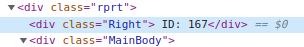

In [ ]:
soup.find_all(class_="Right")    # Можно написать так

In [ ]:
soup.find_all(attrs={"class": "Right"})    # Или так, разницы никакой

#### **Поиск по наличию атрибута**

Для этого при поиске нужно передать аргумент `attr=True` или `attr=False` в зависимости от того, хотим ли мы найти элементы с атрибутом `attr` или без него

In [32]:
soup.find_all("p", class_=True)    # Данная запись позволяет получить все элементы, образованные тэгом p, у которых ИМЕЕТСЯ атрибут class

[<p class="nojs">
 <strong>Warning:</strong>
 	The NCBI web site requires JavaScript to function. 
 	<a href="/guide/browsers/#enablejs" target="_blank" title="Learn how to enable JavaScript">more...</a>
 </p>,
 <p class="res_tagline">Information by organism</p>,
 <p class="hidden" id="submenu_File_hint"></p>,
 <p class="hidden" id="submenu_AddToClipboard_hint"></p>,
 <p class="hidden" id="submenu_AddToCollections_hint"></p>,
 <p class="HTOn">Your browsing activity is empty.</p>,
 <p class="HTOff">Activity recording is turned off.</p>,
 <p class="HTOff" id="turnOn">
 <a cmd="HTOn" href="?cmd=HTOn&amp;" id="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" name="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" onclick="return false;" realname="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" sid="1">Turn recording back on</a>
 </p>,
 <p class="address_footer text-white">National Library of Medicine<br/>
 

#### **Поиск по нескольким фильтрам**

Можно использовать несколько фильтров для поиска, в таком случае просто передаём список в качестве аргумента

In [33]:
soup.find_all(["p", "a"], id=["turnOn", "tree_id"])   # Все элементы, образованные тэгами а и p, у которых атрибут id равен или "turnOn" или "tree_id"

[<a id="tree_id"></a>,
 <p class="HTOff" id="turnOn">
 <a cmd="HTOn" href="?cmd=HTOn&amp;" id="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" name="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" onclick="return false;" realname="EntrezSystem2.PEntrez.Genome2.Genome2_ResultsPanel.HistoryDisplay.HistoryOn" sid="1">Turn recording back on</a>
 </p>]

#### **Поиск по функции**

Данный тип поиска позволяет нам буквально искать элементы, для которых переданная функция выдаст True

Код ниже позволяет нам найти все ссылки (тэг **a**), которые ведут на GenBank (атрибут **href**)

In [34]:
soup.find_all("a", href=lambda x: x.startswith("/nuccore") if x else False)

[<a href="/nuccore/NC_000913.3" target="_blank">NC_000913.3</a>,
 <a href="/nuccore/U00096.3" target="_blank">U00096.3</a>,
 <a href="/nuccore/NC_002695.2" target="_blank">NC_002695.2</a>,
 <a href="/nuccore/BA000007.3" target="_blank">BA000007.3</a>,
 <a href="/nuccore/NC_002127.1" target="_blank">NC_002127.1</a>,
 <a href="/nuccore/AB011548.2" target="_blank">AB011548.2</a>,
 <a href="/nuccore/NC_002128.1" target="_blank">NC_002128.1</a>,
 <a href="/nuccore/AB011549.2" target="_blank">AB011549.2</a>,
 <a class="brieflinkpopperctrl" href="/nuccore?LinkName=genome_nuccore&amp;from_uid=167" ref="log$=recordlinks">Components</a>]

In [35]:
soup.find_all(lambda tag: len(tag.attrs) == 9)   # Все элементы, имеющие ровно 8 атрибутов

[<input autocomplete="off" class="jig-ncbiclearbutton jig-ncbiautocomplete" data-jigconfig="dictionary:'genome',disableUrl:'NcbiSearchBarAutoComplCtrl'" data-sbconfig="ds:'no',pjs:'yes',afs:'yes'" id="term" name="term" title="Search Genome. Use up and down arrows to choose an item from the autocomplete." type="text" value="escherichia coli[orgn]"/>]

Короче вы поняли у нас есть несколько вариантов того, **по чему мы ищем**:
1. Тэг
2. Атрибут

И есть куча вариантов, того, **как мы это ищем**:
1. По точному совпадению
2. По наличию (если имеется, то *True*, иначе `False`)
3. Используя функцию (ищется то, для чего функция выдаёт *True*)
4. Используя список (фильтры внутри списка взаимодействуют через логическое ИЛИ)
5. Используя регулярные выражения (это мы не обсуждали)
6. Используя точное совпадение текста внутри тэга (про это будет позже)

Всё это можно как угодно комбинировать для получения нужного результата

#### **Работа с результатом поиска**

Давайте найдём все ссылки на странице, ссылки образуются при помощи тэга **a**

In [36]:
all_links = soup.find_all("a")
len(all_links)

165

Ссылкок нашлось много, можете распечатать переменную `all_links` из предыдущей ячейки, чтобы на это посмотреть. Но что это и что там лежит? Для простоты будем считать, что `all_links` это список, хотя это не так. Внутри у него находятся все найденные элементы, как же представлены они?

Методы супа для поиска, как правило, возвращают нам специальные объекты с которыми удобно работать. В данном случае список `all_links` содержит объекты `Tag`, каждый из которых представляет из себя один найденный элемент, посмотрим, что он умеет

In [38]:
element = all_links[20]
type(element)

bs4.element.Tag

Мы можем просто распечатать этот элемент и посмотреть на него в первозданном виде

In [39]:
element

<a href="https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz">GFF</a>

Далее при помощи различных атрибутов мы можем разбирать его на составные части

In [40]:
element.attrs    # Словарь с атрибутами элемента

{'href': 'https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz'}

In [41]:
element.text   # Текст, заключенный между открывающим и закрывающим тегами

'GFF'

In [42]:
element.name   # Имя тэга

'a'

При этом самое крутое, что все объекты представляющие элементы в супе очень самостоятельны:
1. Мы можем найти какой-то элемент, а затем произвести новый поиск уже внутри него при помощи тех же самых методов (например, `find_all`)
2. Когда мы получаем объект элемента, он сохраняет связь с остальной страницей, поэтому мы можем использовать специальные атрибуты для **навигации**, чтобы получить его родителя или, наоборот, вложенные в него объекты

In [44]:
element.parent

<span class="shifted">Download genome annotation in  <a href="https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz">GFF</a>, <a href="https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gbff.gz">GenBank</a> or <a href="https://www.ncbi.nlm.nih.gov/genome/browse/#!/proteins/167/161521|Escherichia coli str. K-12 substr. MG1655/">tabular</a> format</span>

In [45]:
list(element.previous_siblings)    # Это previous_siblings возвращает генератор

['Download genome annotation in  ']

In [46]:
list(element.next_siblings)

[', ',
 <a href="https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gbff.gz">GenBank</a>,
 ' or ',
 <a href="https://www.ncbi.nlm.nih.gov/genome/browse/#!/proteins/167/161521|Escherichia coli str. K-12 substr. MG1655/">tabular</a>,
 ' format']

Если мы работаем с элементом, у которого есть вложенные элементы, то по ним тоже можно совершать навигацию.

Сначала получим все таблицы (тэг `table`)

In [47]:
all_tables = soup.find_all("table")
print(len(all_tables))

6


Всего на странице шесть таблиц, возьмём любую из них

In [48]:
table = all_tables[4]

Таблицы в HTML всегда имеют много разных вложенных элементов, основные это:
+ **thead** (table head) - шапка таблицы (строка с названиями колонок)
+ **tbody** (table body) - тело таблицы (все остальные ячейки)
+ **tr** (table row) - строка таблицы
+ **td** (table data?) - ячейка таблицы
+ **th** (table header) - ячейка-заголовок (имя колонки или строки)

Дочерние элементы можно получить при помощи атрибута `children`, это также генератор

In [49]:
[tag.name for tag in table.children]    # "Дети" таблицы

['thead', 'tbody']

In [50]:
[tag.name for tag in list(table.children)[-1]]   # "Дети" тела таблицы это строки

['tr', 'tr', 'tr', 'tr', 'tr', 'tr']

Но такая навигация удобна только для близких друг к другу элементов. Если я хочу получить все значения из ячеек этой таблицы, то удобнее воспользоваться поиском, он работает для всех объектов в beautifulsoup, которые представляют из себя элементы, в том числе для найденной нами ранее таблицы

In [51]:
table.find_all("td")

[<td><span title="chromosome">Chr</span></td>,
 <td>-</td>,
 <td><a href="/nuccore/NC_002695.2" target="_blank">NC_002695.2</a></td>,
 <td><a href="/nuccore/BA000007.3" target="_blank">BA000007.3</a></td>,
 <td>5.5</td>,
 <td>50.5</td>,
 <td><a href="https://www.ncbi.nlm.nih.gov/genome/browse/#!/proteins/167/409151|Escherichia coli O157:H7 str. Sakai/chromosome/" style="color:navy">5,067</a></td>,
 <td>22</td>,
 <td>103</td>,
 <td>1</td>,
 <td>5,329</td>,
 <td>136</td>,
 <td colspan="99"><div id="167_1_div"></div></td>,
 <td><span title="plasmid">Plsm</span></td>,
 <td>pOSAK1</td>,
 <td><a href="/nuccore/NC_002127.1" target="_blank">NC_002127.1</a></td>,
 <td><a href="/nuccore/AB011548.2" target="_blank">AB011548.2</a></td>,
 <td>0</td>,
 <td>43.4</td>,
 <td><a href="https://www.ncbi.nlm.nih.gov/genome/browse/#!/proteins/167/409151|Escherichia coli O157:H7 str. Sakai/plasmid pOSAK1/" style="color:navy">3</a></td>,
 <td>-</td>,
 <td>-</td>,
 <td>-</td>,
 <td>3</td>,
 <td>-</td>,
 <td co

#### **Практика**

Используя полученные знания по beautifulsoup попробуем получить в питоне вот этот текст

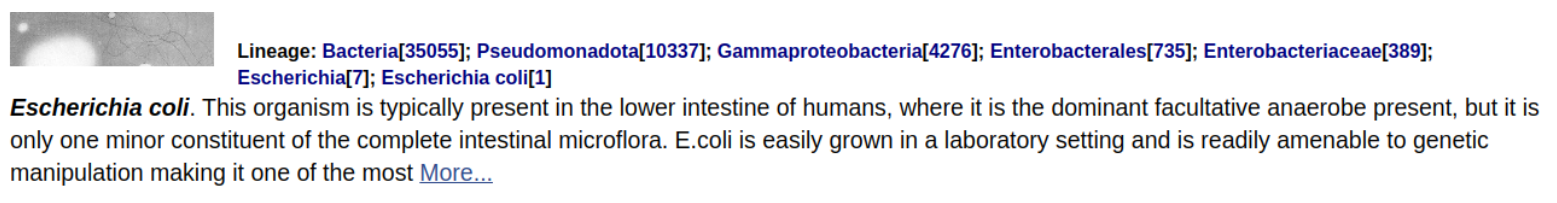

Здесь всё немного осложняется тем, что этот текст не выделен в отдельный тег

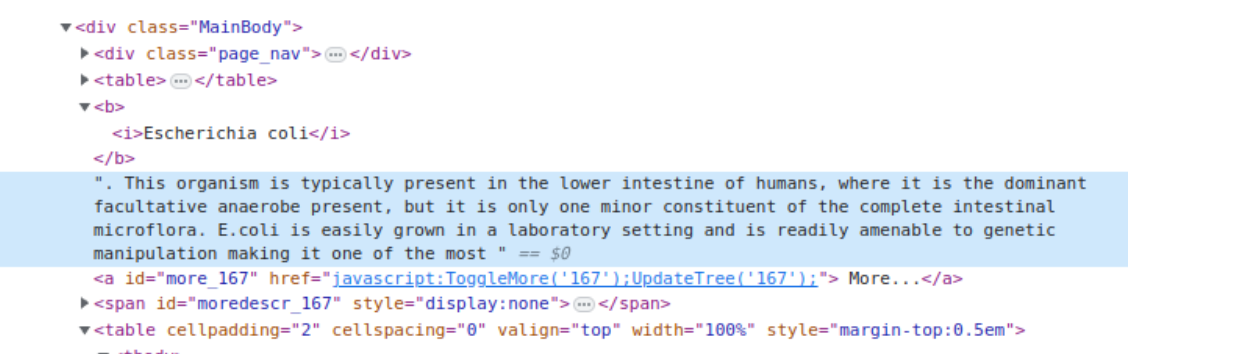

Будем разбираться, сначала сделаем суп

In [53]:
response = requests.get("https://www.ncbi.nlm.nih.gov/genome", params={"term": "Escherichia coli"})
soup = BeautifulSoup(response.content, "lxml")

##### **1 вариант** 

Так как наш текст не заключён ни в какой тэг, у нас не получится найти его напрямую. Поэтому давайте попробуем найти родительский тэг `div`, а потом уже вытащим оттуда наш текст

In [54]:
div = soup.find_all("div", class_="MainBody")[0]

Наш текст является 4 по счёту "ребёнком" в данном элементе (после `div`, `table` и `b`)

In [55]:
list(div.children)[3]

'. This organism is typically present in the lower intestine of humans, where it is the dominant facultative anaerobe present, but it is only one minor constituent of the complete intestinal microflora. E.coli is easily grown in a laboratory setting and is readily amenable to genetic manipulation making it one of the most '

Готово, но можно было и по-другому

##### **2 вариант** 

Перед нашим текстом следует название вида, выделенное жирным и курсивом, при этом мы знаем точный текст, так как мы знаем название вида.

Отфильтровать элементы по точному совпадению текста внутри тегов можно при помощи ещё одного аргумента метода `find_all` - `string`

In [56]:
soup.find_all("b", string="Escherichia coli")    # Ищем все теги b внутри которых есть текст "Escherichia coli"

[<b>Escherichia coli</b>, <b><i>Escherichia coli</i></b>]

Такой тэг не один. Можно или просто взять второй результат (они возвращаются в порядке следования на странице) или модифицировать запрос, чтобы оставить только один. Реализуем последний вариант

Код ниже ищет все теги `b`, у которых первый дочерний элемент это `i`, а внутри есть текст "Escherichia coli"

In [57]:
ecoli_elements = soup.find_all(lambda tag: tag.name == "b" and next(tag.children).name == "i", string="Escherichia coli")
ecoli_elements

[<b><i>Escherichia coli</i></b>]

Это нам уже подходит. Кроме того, мы знаем, что искомый текст это следующий сестринский элемент по отношению к найденному только что. Мы с вами уже знаем, как получать сестринские элементы

In [58]:
ecoli_elements[0].next_sibling    # Успех

'. This organism is typically present in the lower intestine of humans, where it is the dominant facultative anaerobe present, but it is only one minor constituent of the complete intestinal microflora. E.coli is easily grown in a laboratory setting and is readily amenable to genetic manipulation making it one of the most '

#### **Стратегия поиска**

Можно придумать ещё миллион различных способов найти этот текст, но обычно при поиске следует придерживаться некоторых принципов:
1. Самый базовый принцип, ваш способ должен быть устойчивым к небольшим изменениям на странице и стабильно работать с ращличными страницами, построенными по одному плану. Чтобы обеспечить выполнение данного принципа стоит придерживаться вытекающих отсюда правил
2. Чем меньше раз вы используете `find_all` в процессе поиска, тем более устойчивым к изменениям будет ваш алгоритм. В идеале нужно стараться найти нужный элемент за один вызов
3. Чем меньше, количество элементов на которые вы опираетесь, тем лучше. Очевидно, что поиск через `list(element.parent.parent.next_sibling.children)[2]` легко может сломаться на какой-то другой странице, так как мы зависим от целых 5 элементов (`element`, `element.parent`, `element.parent.parent`, `element.parent.parent.next_sibling` и list(element.parent.parent.next_sibling.children)[2]). Данные элементы могут немного варьироваться от страницы к странице, поэтому изменения в любом из них могут сломать весь алгоритм поиска. Чем меньше у вас таких опасных точек, тем лучше
4. Стоит очень осторожно проихводить поиск по точным совпадениям

Данные правила применимы только к ситуации, когда вам нужно распарсить много однотипных страниц (например, 1000 видов с NCBI). Если вам нужна только одна страница и не нужна воспроизводимость, то тогда можно делать так, как вам удобнее и быстрее



### API

### Определение

**API** (**A**pplication **P**rogramming **I**nterface) это **крайне важное** понятие в программировании в целом, поэтому мы сначала разберёмся в том, что это такое, а потом рассмотрим это в применении к интернету.

[Формальное определение](https://ru.wikipedia.org/wiki/API) говорит, что **API** это "описание способов взаимодействия одной компьютерной программы с другими". Звучит как-то слишком обще.

Вместо этого давайте посмотрим на саму аббревиатуру и разберём её по словам:
1. **Application** &mdash; приложение в самом широком смысле. Это может быть какая-то ваша программа, скачанная библиотека, веб сервис и т.д.
2. **Programming** в данном случае означает, что мы работаем с кодом, другого особого смысла это слово здесь не несёт
3. **Interface**. А это уже ключевое слово и мы с вами даже знаем, что это такое (см. лекцию по ООП часть 2). Интерфейс это некоторый набор **методов**, иначе говоря, некоторых **действий**, которые мы можем совершать. **Интерфейс** нашего **приложения** это то, что оно умеет делать.

Теперь попробуем собрать всё это воедино и соотнести с формальным определением. Программам (приложениям) постоянно приходится общаться друг с другом, например, файловый менеджер как-то взаимодействует с файловой системой, `seaborn` взаимодействует с `pandas`, гугл-таблицы взаимодействуют с гугл-документами и т.д. Но для того, чтобы приложения общались друг с другом, их ещё сначала надо "научить" этому. Это "обучение" происходит путём создания специального **интерфейса** в приложениях, который могут использовать другие приложения. То есть мы определяем специальные **действия**, благодаря которым приложения могут общаться.

Пример:
У нас есть два приложения: голый Python без модулей и файловая система вашей ОС.

Задача: "научить" питон взаимодействовать с файловой системой (просматривать, удалять, копировать, перемещать файлы и папки)

Очевидно, что голый питон не способен осуществлять все эти задачи, поэтому он не может полноценно общаться с файловой системой. Для того, чтобы он научился это делать, нам необходимо создать **интерфейс** для этого взаимодействия с обеих сторон, то есть какой-то набор действий.

Со стороны питона таким **API** выступает модуль `os`, который задаёт действия по взаимодействию с файловой системой. Если представить, что файловая система это некоторый black box, то модуль `os` это ручки, которые торчат из чёрного ящика наружу и позволяют нам с ним взаимодействовать.

Со стороны файловой системы тоже есть свой API, но его может использовать не только питон, но и другие программы. Примеры: (1) bash команда *ls* использует API файловой системы, файловый менеджер с GUI использует API файловой системы, браузер, когда вы скачиваете или загружаете файл, предлагает вам выбрать файл/папку для загрузки, это тоже использование API файловой системы.

Другие же программы уже могут использовать API питона, например, ваш код в любой домашке. Когда вы пишите на питоне, вы автоматически используете его API. Питон же в свою очередь написан на C, а значит для выполнения многих функций из питона под капотом используется API языка C для взаимодействия с питоном

И так можно продолжать до бесконечности. Весь софт, который мы используем, взаимодействует друг с другом при помощи определённых наборов действий, это и есть **API**

### Больше примеров

Понятие API довольно размытое и неинтуитивное. Оно лучше всего осознаётся при помощи пропускания через свою голову большого количества примеров 

#### Библиотеки Python

Если вы хотя бы раз заходили в официальную документацию Python библиотек (я надеюсь). Вы 100% видели там раздел *API* или *API reference*

**в pandas**

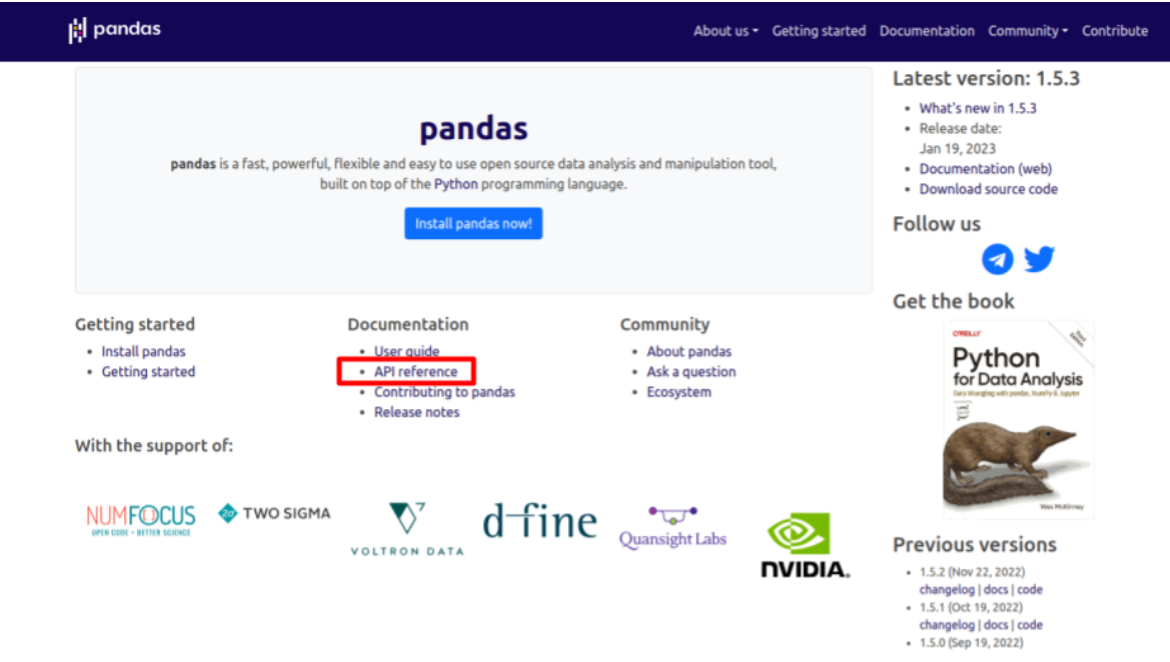

**в biopython**

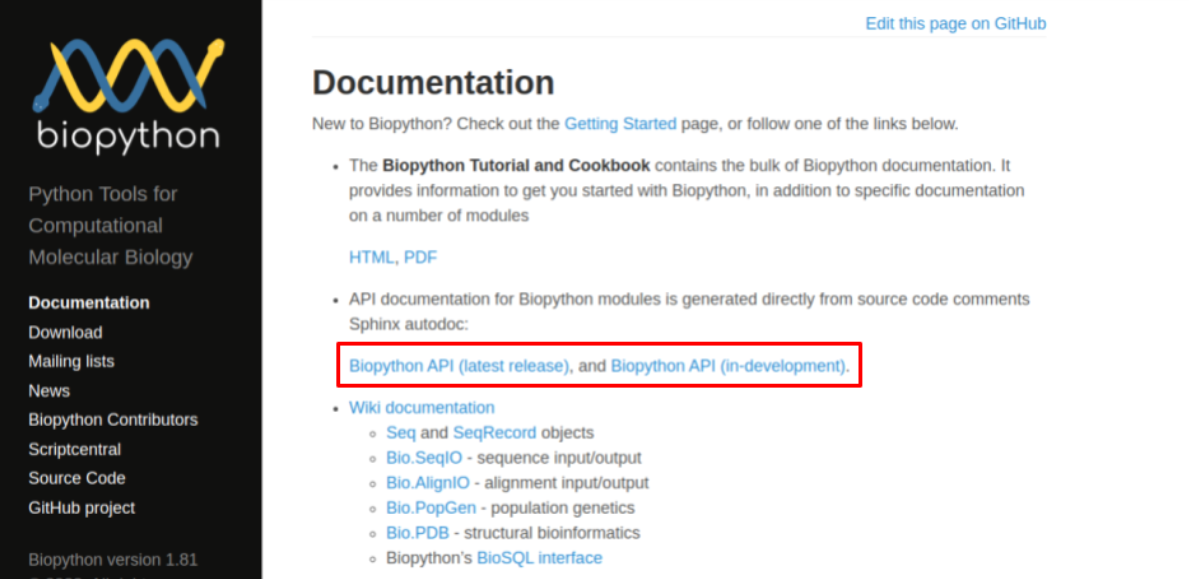

**в matplotlib**

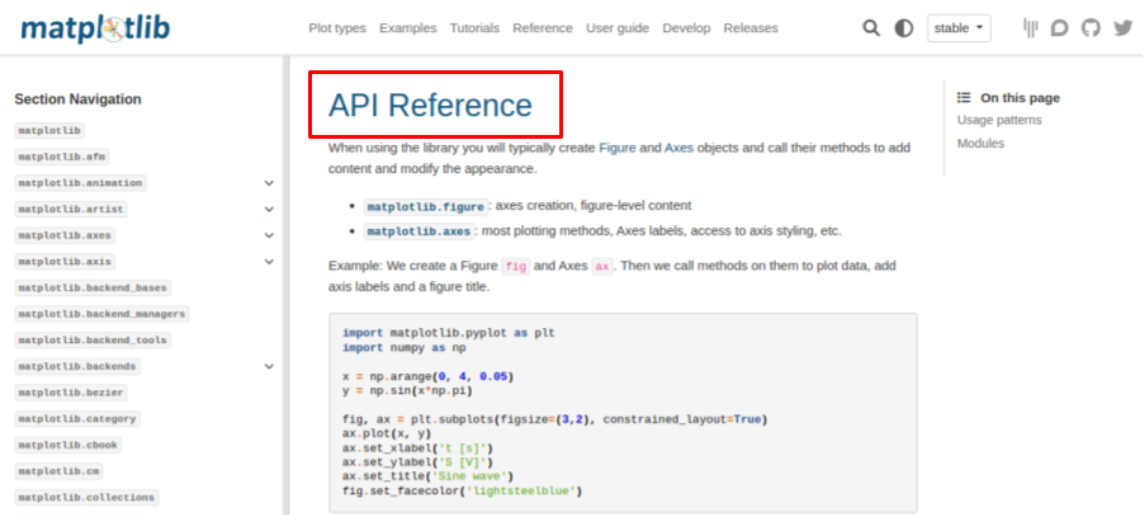

**короче, везде**

В этих разделах описывается **API** библиотек, то есть то, что они умеют делать. Зачастую это просто длинный список функций и классов, где для каждой функции/класса описывают аргументы, возвращаемые значения и т.д. (то есть буквально описание интерфеса). API библиотек создано для того, чтобы библиотеки могли взаимодействовать с нашим кодом. Если бы в модуле `requests` были только низкоуровневые функции, представляющие его внутренние "кишки", то он был бы гораздо менее полезен. Разработчики знают об этом, поэтому создали удобный API &mdash; функции `requests.<method>`, которые предоставляют нам интерфейс для взаимодействия с "кишками" request, при этом позволяя нам абстрагироваться от внутреннего устройства библиотеки 

#### Низкоуровневые API

Или вот пример ещё более низкоуровнего API &mdash; https://www.kernel.org/doc/html/v4.14/filesystems/index.html. Это API для взаимодействия файловых систем с ядром ОС

Драйверы для "железа" это тоже API

По сути API есть у любого ПО, которое хоть как-то открыто к взаимодействию

### Теория

API в применении к интернету несёт все те же общие черты, что мы разобрали ранее. К этому моменту у вас уже должно было сформироваться примерное понимание того, что такое API в общем смысле

API в интернете это также набор каких-то действий, которые мы можем совершать для взаимодействия с каким-либо сервисом. Отличается тут только способ, при помощи которого мы используем этот API

Для работы с интернет API мы должны будем делать **запросы** и очень круто, что мы их уже умеем делать.

Многие популярные сервисы имеют свои API, для примера возьмём тот же GitHub

Допустим, что нам пришла в голову мысль собрать статистики по коммитам со всех репозиториев, где есть Python код. Это вполне выполнимая задача, мы с вами уже умеем парсить страницы и разбираться в структуре URL. Эта задача займёт у нас довольно много времени, но она выполнима. В то же время разработчики GitHub понимают, что кому-то может потребоваться подобная информация или быть может кто-то захочет автоматизировать создание репозиториев, форков, коммитов, что тоже реализуемо разобранными нами методами, но это уже переходит в разряд очень сложных задач. Для таких случаев разработчики GitHub сделали специальный API, который позволяет нам сэкономить кучу времени, так как разработчики уже реализовали для нас весь необходимый функционал.

Как же подобный API работает?

Разработчики отводят ряд определённых URL под API. То есть у сайта появляются специальные URL, при обращении к которым мы будем получать желаемый результат. Такие URL называются **API endpoints**. Рассмотрим на примере (пример выдуманный):

1. Разработчики (гитхаба) определяют специальный URL путь, который будет отвечать за все запросы к API. Например, `https://github.com/api`. То есть все запросы вида `https://github.com/api/<something_else>` будут обращаться непосредственно к GitHub API
2. Далее разработчики добавляют в API функционал. Например, "получить список коммитов для указанного пользователя". Обычно в API такой функционал называют **методом**. В документации к API всегда подробно написано, как работать с данным методом. Вернёмся к методу для получения списка коммитов, назовём его `getCommitsList`. API веб сервисов, как правило, не расчитан на использование с конкретным языком программирования, поэтому зачастую там будут общие формулировки, применимые к любому языку, который умеет делать HTTP запросы. Например, для нашего метода может быть написано что-то в духе "make GET request to the endpoint `https://github.com/api/getCommitsList`. Possible parameters are: `user` (required), `numCommits` (optional, default=5)". Опять же это максимально общее объяснение без привязки к языку, давайте переведём это в понятный нам Python код.

```python
response = requests.get("https://github.com/api/getCommitsList", params={"user": "torvalds", "numCommits": 5})
```
    
Мы всё сделали:
+ Запрос к указанному в документации **endpoint**
+ Это GET запрос
+ Мы указали желаемые параметры запроса (в случае GET запросов, когда мы говорим о параметрах, то почти всегда имеем ввиду имеено query string)

и получили желаемый результат в виде HTTP ответа.

Как правило ответы от API представлены в формате JSON, так как он хорошо подходит для структурирования данных

У очень многих популярных сервисов есть свои API и их легко найти в интернете, например, просто набрать в поиске "YouTube API" или "Telegram API"

### Практика

Рассмотрим на примере взаимодействие с конкретным API, для этого мы посетим репозиторий https://github.com/public-apis/public-apis, где собрано огромное количество ссылок на сервисы с публичными API.

Здесь важно упомянуть, что многие API требуют для использования специальный токен - API Key. Это совершенно нормальная практика, которая позволяет авторам API регулировать трафик. Для получения API токена обычно надо зарегистрироваться, оставить заявку, сделать запрос на определённый URL, заплатить и т.д. Для простоты здесь мы рассмотрим API не требующий токена, но не пугайтесь, если вдруг когда-то такое увидите

Рассмотрим это на примере простого API, которое позволяет получать картинки котиков https://cataas.com/#/. У данного API есть довольно приятное и понятное описание с примерами (такое, к сожалению, бывает не всегда).


Прочитав документацию мы выясним, что в ней для разных действий указаны разные URL (это **endpoints**), причём они указаны в виде **путей**. Изучив документацию мы поймём, что данные пути должны "приклеиваться" к запросам на базовый URL - https://cataas.com. В данной документации нет явного разделения на **методы**, а скорее просто перечисляются возможные варианты запросов

#### **Простой запрос**

Ну ок, давайте попробуем сделать запрос по пути `/cat`, который должен вернуть нам случайного котика

In [11]:
import requests

In [12]:
response = requests.get("https://cataas.com/cat")
response

<Response [200]>

По статус-коду 200 мы видим, что запрос прошёл успешно, но как же выглядит тело ответа? Может быть это JSON?

In [13]:
response.json()    # Не похоже

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Может быть это текст?

In [14]:
response.text[:20]      # Да не, какая-то дичь

'�PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01�'

Хотя по первым символам можно догадаться, что это картинка

В связи с этим возникает закономерный вопрос, а как нам получить эту картинку в нормальном виде?

Стандартной практикой для получения картинок и любых произвольных файлов из HTTP ответов является **сохранение содержимого ответа в файл в бинарном виде**

Мы уже знаем как это делать, метод `response.content` хранит тело запроса в бинарном виде, а также мы знаем, как открывать файлы на запись бинарных данных 

Для простоты переиспользования кода напишем простую функцию

In [15]:
def save_content(response, file_path):
    with open(file_path, "wb") as file:
        file.write(response.content)

Мы открываем файл в режиме "write binary" и записываем в него содержимое ответа, всё, никаких фокусов

In [16]:
save_content(response, "image.png")    # В текущей папке у нас появилась картинка, которую можно открыть

Но мы хотим открыть картинку в питоне, не вопрос

In [17]:
import matplotlib.pyplot as plt


def show_image(img_path):
    image = plt.imread(img_path)
    plt.imshow(image)
    plt.axis("off")

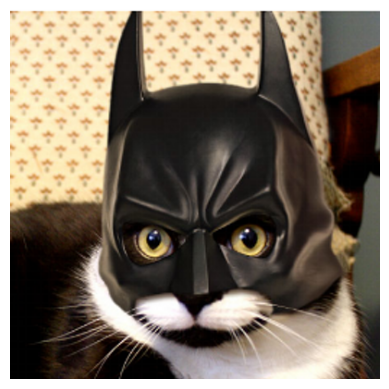

In [18]:
show_image("image.png")     # Ура, котик!

#### **Лайфхаки** (модуль io)

Но сохранять картинку в файл не очень удобно. Неужели нет способа отобразить её сразу из питона, минуя сохранение в файл? Конечно же можно

Для подобных случаев в питоне есть специальный модуль **io** (включён в стандартную библиотеку языка). Он предоставляет нам **объекты, которые ведут себя в точности как файлы, но при этом файлами не являются**. Например, объект `io.BytesIO` имитирует файл, открытый в бинарном режиме, это то, что нам нужно

In [20]:
import io

In [35]:
response = requests.get("https://cataas.com/cat")
buffer = io.BytesIO()   # Такие объекты часто называют buffer
buffer.write(response.content)
show_image(buffer)

SyntaxError: not a PNG file (<string>)

Не работает! Это крайне неочевидно, но ошибка происходит из-за того, что мы записали что-то в "файл", но не можем оттуда ничего прочитать, так как после записи мы как бы находимся в самом конце "файла".

Но мы вспомним про волшебный метод `seek`, который позволяет нам вернуться к определённому байту. Давайте сразу перепишем код в удобную функцию и внесём эту правку

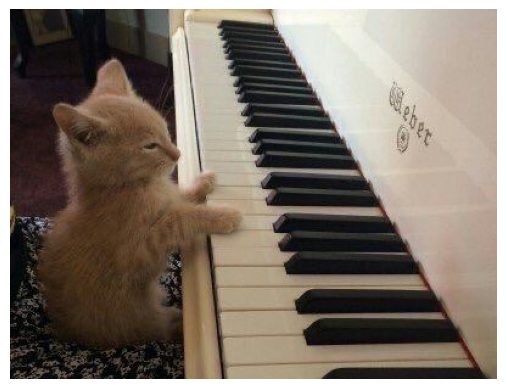

In [63]:
def show_response_image(response):
    buffer = io.BytesIO()
    buffer.write(response.content)
    buffer.seek(0)    # Возвращаемся на 0 байт в файле (в начало)
    image = plt.imread(buffer, format="gif")   # Поменяли формат на GIF, так как большинство картинок по этому API именно в нём, а plt.imread не умеет его распознавать
    plt.imshow(image)
    plt.axis("off")
    

response = requests.get("https://cataas.com/cat")
show_response_image(response)

#### **Более сложный запрос**

Давайте теперь сделаем запрос по шаблону `/cat/says/:text?size=:size&color=:color`, указанному в документации. Это позволит нам получить картинку котика с каким-то текстом определённого размера и цвета, а также добавим параметр `:tag`, который описывается в отдельном пункте документации. Итого получим `/cat/:tag/says/:text?size=:size&color=:color`

In [74]:
response = requests.get("https://cataas.com/cat/says/привет_мир", params={"size": 2, "color": "grey"})  
response

<Response [200]>

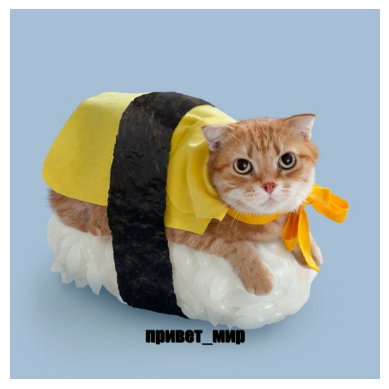

In [75]:
show_response_image(response)

Хочу текст побольше и другого цвета

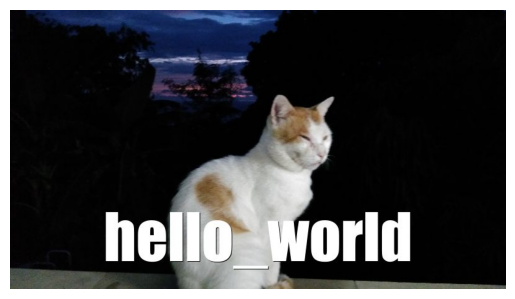

In [112]:
response = requests.get("https://cataas.com/cat/says/hello_world", params={"fontSize": 100, "fontColor": "white"})
show_response_image(response)

#### Типичный ответ от API это JSON

На самом деле то, что мы делали до сих пор это скорее исключение из правил. Чаще всего **ответы** от API мы получаем в формате JSON, благо данный сервис тоже предоставляет такую возможность, нужно просто указать дополнительный параметр `json=true`

In [113]:
response = requests.get("https://cataas.com/cat/says/hello world", params={"json": "true"})
response.text

'{"tags":["Cat","Sniper","Scout"],"createdAt":"2022-04-26T23:36:52.182Z","updatedAt":"2022-10-11T07:52:32.651Z","mimetype":"image/jpeg","size":191793,"_id":"xzr7MVgLAZnV6LAg"}'

Круто, мы получили JSON, но он представлен в виде строки. Мы можем использовать функцию `json.loads`, чтобы сделать из этого словарь, но **requests** делает жизнь ещё проще, просто вызовем метод `json` объекта ответа

In [115]:
response.json()

{'tags': ['Cat', 'Sniper', 'Scout'],
 'createdAt': '2022-04-26T23:36:52.182Z',
 'updatedAt': '2022-10-11T07:52:32.651Z',
 'mimetype': 'image/jpeg',
 'size': 191793,
 '_id': 'xzr7MVgLAZnV6LAg'}

В этом JSON объекте уже содержится гораздо больше информации, её можно как-то использовать по своему усмотрению

Заметьте, что мы не получили картинку в теле ответа, как в предыдущем примере. Это происходит из-за того, что нельзя отправить в одном ответе и JSON и картинку. В подобных случаях ссылку на картинку или любой другой файл обычно помещают в JSON.

Таким образом, для получения картинки через JSON нужно будет сделать два запроса (и это стандартная схема для большинства API)

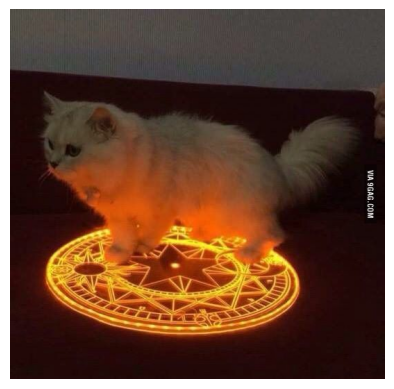

In [145]:
json_response = requests.get("https://cataas.com/cat/says/hello world", params={"json": "true"})
image_response = requests.get("https://cataas.com/cat/" + json_response.json()["_id"])
show_response_image(image_response)

### Немного примеров интернет API "из жизни"

По своей сути API это универсальный способ взаимодействия с сервисом с любой платформы. Возьмём, например, Stepik, у которого тоже есть API.

У Stepik помимо веб-сайта есть ещё и мобильные приложения для iOS и Android. Согласитесь, было бы очень неудобно делать с нуля три варианта приложения (веб и приложения на смартфонах), такую систему очень трудно поддерживать и развивать. Поэтому у Stepik и существует API. Разработчики делают некоторый ключевой функционал и оборачивают его в API, а то, что мы видим в браузере или в мобильном приложении это всего лишь красивая графическая обёртка, под которой выполняются универсальные запросы к API, они и обеспечивают всю функциональность.

Аналогично с каким-нибудь YouTube, VK или Telegram. Вы никогда не задумывались, как так получается, что у данных сервисов есть "альтернативные приложения" не от основных разработчиков? Неужели какой-то энтузиаст способен полностью с нуля написать логику YouTube? Конечно нет, такие альтернативные приложения тоже целиком и полностью построены на API данных сервисов и представляют их себя просто другую обёртку (в них ещё может удаляться ненужный функционал или добавляться новый, но только в рамках, которые определяет API)

Так что по сути с полученными знаниями вы уже можете написать свои приложения для Telegram и Stepik, просто используя их API

Или можно взять любой сервис, который предлагает услуги ИИ. Ну, например, [вот этот](https://useadrenaline.com/playground). В 99%, когда вы видите подобный сервис, это не собственная разработка автора, а просто графическая оболочка под API какого-нибудь Google или OpenAI. У простого смертного пока не может быть достаточно вычислительных ресурсов для обучения подобной модели, так что большинство таких сервисов это API от более крупных игроков

У NCBI есть свой API, который интегрирован в десктопные утилиты **E-utilities**. В идеале получать информацию с NCBI надо именно при помощи их API или утилит, а не как мы это делали с вами. Но у NCBI API и **E-utilities** такая отвратительная документация, что парсинг страниц через регулярки на её фоне может показаться весьма неплохим решением

## Дополнительные материалы

+ Курс на степике - https://stepik.org/course/512/syllabus (уроки 3.3 - 3.6). Там довольно понятно рассказывается и про requests, и про json, и про API, и про парсинг страниц. Есть прикольные и несложные задачки (правда парсить страницы в них придётся через регулярки...)
+ Репозиторий с большой коллекцией разных публичных API - https://github.com/public-apis/public-apis
+ Документация "красивого супа" - https://beautiful-soup-4.readthedocs
+ Страница про API в википедии - https://ru.wikipedia.org/wiki/API
+ Популярное видео про прошлое и настоящее интернет API - https://youtu.be/BxV14h0kFs0

## Работа с динамическими сайтами

Мы с вами уже довольно уверенно умеем пользоваться Интернетом через питон, благодаря парсингу HTML страниц и запросам к API. Но проблема состоит в том, что парсинг HTML страниц это не панацея. Данный подход работает только для **статических** веб страниц, то есть мы не умеем заполять различные поля для ввода на сайтах и "нажимать" на кнопки при помощи питона. Сегодня мы как раз таки научимся так делать

В данной лекции мы научимся взаимодействовать с **формами** через Python. В этой лекции будет присутствовать много примеров HTML кода, открывайте ячейки для редактирования, чтобы просматривать его

In [1]:
import requests
from bs4 import BeautifulSoup

### HTML формы

#### Структура формы

**Формы** &mdash; это способ коммуникации сайта с пользователем. Форма представляет из себя различные поля для ввода, это позволяет нам передавать сайту произвольные данные, например:
1. Текст
    + Логин
    + Пароль
    + email
    + Текст поста в соцсети
    + и др
2. Файл
3. Выбор из нескольких вариантов
4. Checkboxes и radiobuttons
5. и многое другое

В HTML формы выглядят примерно вот так (откройте ячейку для редактирования, чтобы посмотреть на HTML код)

<form action="/submit-form" method="POST">
  <label for="name">Name:</label>
  <input type="text" id="name" name="name" required><br><br>

  <label for="email">Email:</label>
  <input type="email" id="email" name="email" required><br><br>

  <label for="password">Password:</label>
  <input type="password" id="password" name="password" minlength="8" required><br><br>

  <label for="age">Age:</label>
  <input type="number" id="age" name="age" min="18" max="100" required><br><br>

  <label for="gender">Gender:</label>
  <select id="gender" name="gender" required>
    <option value="">--Please choose an option--</option>
    <option value="male">Male</option>
    <option value="female">Female</option>
    <option value="other">Other</option>
  </select><br><br>

  <label for="birthdate">Date of Birth:</label>
  <input type="date" id="birthdate" name="birthdate" required><br><br>

  <label for="color">Favorite Color:</label>
  <input type="color" id="color" name="color" required><br><br>

  <label for="file">Upload a file:</label>
  <input type="file" id="file" name="file"><br><br>

  <label for="terms">Agree to terms and conditions:</label>
  <input type="checkbox" id="terms" name="terms" required><br><br>

  <input type="submit" value="Submit">
</form>

Формы имеют ряд особенностей:
1. Формы образуются при помощи тэга `form`
    + Формы имеют атрибут `action`, значение в этом атрибуте показывает по какому адресу будет произведён запрос при отправке формы
    + Формы имеют атрибут `method`, значение в этом атрибуте показывает какой метод запроса будет использован при отправке формы (чаще всего с формами используется POST)
2. Внутри формы (между открывающим и закрывающим тегами `form`) находятся разнообразные поля для ввода данных
    + Чаще всего поля для ввода данных образованы тэгами `input`, но бывают и исключения (тэги `select`-`option` в примере выше)
    + Поля для ввода могут иметь свои атрибуты, которые влияют на тип вводимых данных. Например, `<input type="file">` позволит загрузить файл, а `<input type="checkbox">` позволит поставить галочку
    + Поля для ввода внутри форм могут иметь атрибут `name`, который будет нам крайне полезен в дальнейшем
    + У форм могут быть **скрытые** поля для ввода, они образуются при помощи тэга `<input type="hidden">`. Такие поля не видны пользователю в браузере <input type="hidden">
3. Формы зачастую имеют специальную кнопку, предназначенную для отправки введённых данных. Она может быть представлена тэгами `<input type="submit">` или `<button type="submit">`

#### Что происходит при отправке формы?

Допустим, что мы ввели все необходимые данные в форму и нажали на кнопку "Submit". Что произойдёт дальше?

Сразу же начнёт составляться HTML запрос. При этом будет использован метод запроса из атрибута `method` формы. Затем начнёт формироваться тело запроса из данных, которые мы предоставили. Но тело запроса ещё необходимо представить в каком-то удобном формате, поэтому его нужно определённым образом форматировать (закодировать). Это можно сделать различными методами, среди которых:
1. `application/x-www-form-urlencoded`
2. `multipart/form-data`
3. `text/plain`
4. `application/json`
5. и так далее

Любой из данных методов можно указать как значение атрибута `enctype` в тэге `form`.

Многие из доступных форматов кодирования используют ключи и значения, так как это очень удобно. Например, при заполнении формы <input name="some_text_field" value="some_value"> и её отправке, с использованием большинства типов кодировок в запросе, эти данные будут храниться в формате ключ-значение, где **ключом выступает значение атрибута `name`** в поле для ввода, а в качестве **значения** будут **введённые данные** или, если они не были введены, то **значение атрибута `value`**

Далее мы посмотрим на разные кодировки и содержимое тела запроса при заполнении данной формы

<form action="/submit-form" method="POST">
  <label for="name">Name:</label>
  <input type="text" id="name" name="name" value="John Doe" required><br><br>

  <label for="email">Email:</label>
  <input type="email" id="email" name="email" value="johndoe@example.com" required><br><br>

  <label for="age">Age:</label>
  <input type="number" id="age" name="age" value="30" min="18" max="100" required><br><br>

  <label for="newsletter">Subscribe to newsletter:</label>
  <input type="checkbox" id="newsletter" name="newsletter" checked><br><br>

  <label for="gender">Gender:</label>
  <select id="gender" name="gender" required>
    <option value="">--Please choose an option--</option>
    <option value="male">Male</option>
    <option value="female">Female</option>
    <option value="other" selected>Other</option>
  </select><br><br>

  <button type="submit">Submit</button>
</form>

##### application/x-www-form-urlencoded

Это самая простая кодировка. В ней все пары ключ-значение соединяются через `=` и разделяются `&`. Почти как в query string, но здесь это не часть URL, а часть тела запроса.

Тело запроса с такой кодировкой при отправке формы выше будет выглядеть вот так

```
name=John+Doe&email=johndoe%40example.com&age=30&newsletter=on&gender=other
```

**Ключи** здесь **соответствуют значениям атрибутов `name`** в полях для ввода, а **значения данным введённым или выбранным пользователем**. Обратите внимание, что значение для галочки это `on`, хотя ни в коде, ни глядя на отрисованную форму мы такого не видим. Позже мы научимся определять значения для таких необычных данных.

Данная кодировка крайне широко используется для простых запросов, но, например, она не поддерживает бинарные данные, поэтому при помощи неё нельзя передать произвольный файл по типу картинки

##### multipart/form-data

Более необычный, но также очень широко распространённый тип кодировки тела запроса. Здесь данные также представлены в формате ключ-значение, но разные пары ключ-значение отделены друг от друга более сложным образом

```
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="name"

John Doe
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="email"

johndoe@example.com
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="age"

30
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="newsletter"

on
------WebKitFormBoundaryABC123
Content-Disposition: form-data; name="gender"

Other
------WebKitFormBoundaryABC123--
```

Данная кодировка позволяет передавать произвольные бинарные данные (то есть можно передать любой файл), а также используется для передачи больших объёмов данных. При передаче файлов в 99% случаев используется именно она.

##### application/json

C JSON мы уже знакомы, тело запроса с такой кодировкой будет выглядеть вот так

```
{
  "name": "John Doe",
  "email": "johndoe@example.com",
  "age": 30,
  "newsletter": true,
  "gender": "Other"
}
```

##### plain/text

Данная кодировка намного менее распространённая, чем те, которые обсуждались выше. Тело запроса будет выглядеть вот так
```
John Doe
johndoe@example.com
30
on
Other
```

Это просто список значений по одному на каждой строке, даже без ключей

#### Зачем нам все эти кодировки?

Нам не особо важно знать, что будет внутри запроса, но для нашей работы нам нужно запомнить несколько важных моментов касательно отправки форм:
1. В подавляющем большинстве случаев при отправке данных через форму **нам нужны пары ключ-значение** для всех наших данных
2. **Ключи можно найти в атрибутах `name`** тэгов, осуществляющих ввод данных (`input`, `select`, ...) и находящихся внутри формы
3. **Значениями выступают те данные, которые мы ввели**. В случае текста это введённый текст, в случае галочки это её статус on/off true/false, в случае загрузки файла это последовательность байтов в файле и так далее. Если мы не вводили данные, то используется **значение из атрибутов `value`** тэгов, осуществляющих ввод данных (`input`, `select`, ...) и находящихся внутри формы, к примеру, это могут быть значения по-умолчанию для опциональных полей для ввода или значения для скрытых полей

После того, как мы составили тело запроса, нам нужно его отправить. Адрес для отправки указан в атрибуте `action` тэга `form`. Как правило, там указывается относительный URL. То есть при отправке формы `<form action="/some/url/path"></form>` на сайте `site.com`, мы отправим запрос на `https://site.com/some/url/path`

#### Круто, а как сделать тоже самое в питоне?

1. Находим метод запроса в атрибуте `method` формы
2. Находим адрес в атрибуте `action` формы
3. Находим все поля для ввода данных и их имена в атрибутах `name`
4. Придумываем значения для данных полей
5. Составляем пары ключ-значение из пунктов 3 и 4 (делаем словарь)
6. Собираем всё вместе и отправляем запрос

То есть запрос по отправке следующей формы из питона

<form action="/submit-form" method="POST">
  <label for="name">Name:</label>
  <input type="text" id="name" name="name" value="John Doe" required><br><br>

  <label for="email">Email:</label>
  <input type="email" id="email" name="email" value="johndoe@example.com" required><br><br>

  <label for="age">Age:</label>
  <input type="number" id="age" name="age" value="30" min="18" max="100" required><br><br>

  <label for="newsletter">Subscribe to newsletter:</label>
  <input type="checkbox" id="newsletter" name="newsletter" checked><br><br>

  <label for="gender">Gender:</label>
  <select id="gender" name="gender" required>
    <option value="">--Please choose an option--</option>
    <option value="male">Male</option>
    <option value="female">Female</option>
    <option value="other" selected>Other</option>
  </select><br><br>

  <button type="submit">Submit</button>
</form>

будет выглядеть как-то так

```python
site_url = "https://site.com"

form_data = {
    "name": "Jonh Doe",
    "email": "johndoe@example.com",
    "age": 30,
    "newsletter": "on",
    "gender": "other"
}

requests.post(site_url + "/submit-form", data=form_data)
```

Аргумент `data` в функции `requests.post` указывает, что данные передаются именно в теле запроса, а не в query string (для этого есть аргумент `params`)

#### Примеры запросов с отправкой форм на "хороших" сайтах

Возьмём сайт [wooordhunt](https://wooordhunt.ru/), это Русско-Английский и Англо-Русский словарь. На главной странице в глаза бросается единственное поле для ввода, это и есть часть формы. Рассмотрим её подробнее в инструментах для разработчика

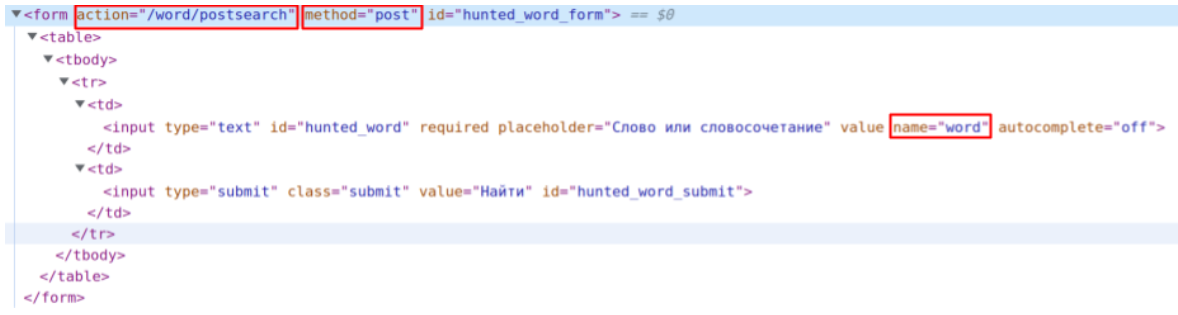

Это прекрасный учебный пример, короткая форма с один полем, где мы сразу видим все интересующие нас элементы для того, чтобы сделать запрос.

Составим запрос согласно инструкции выше и вытащим что-нибудь интересное из результатов

In [7]:
your_word = "Method"
response = requests.post("https://wooordhunt.ru/word/postsearch", data={"word": your_word})
soup = BeautifulSoup(response.content, "lxml")
soup.find("div", class_=lambda attr_val: attr_val.startswith("t_inline_") if attr_val else False).text

'метод, способ, методика, прием, порядок, система, классификация'

Работает! Но это, можно сказать, идеальный пример. К тому же, попробовав перевести несколько слов через браузер, мы увидим, что нужную информацию можно получить и при помощи GET запроса на нужный URL, например, `https://wooordhunt.ru/word/method`. Однако такое бывает далеко не везде

#### Примеры запросов с отправкой форм на "плохих" сайтах

К сожалению, в реальной жизни всё иногда бывает не так просто, как в примере выше. Например, формы могут покрывать собой почти всю страницу, а некоторые критически важные для запроса **скрытые поля** бывает довольно трудно найти.

Для примера возьмём страницу с [геномом *Escherichia coli*](https://www.ncbi.nlm.nih.gov/nuccore/NC_002695.2) в GenBank.

❗❗❗Настоятельно рекомендую самостоятельно проделывать все описанные шаги в браузере, простое прочтение материала принесёт мало пользы и только заберёт ваше время.

Допустим, что мы хотим распарсить страницу с целью получения нуклеотидной последовательности. Изначально она не показана, поэтому если мы сделаем простой GET запрос на эту страницу, то не получим желаемого результата. Для отображения последовательности нам нужно будет раскрыть мини-меню справа и выбрать нужные опции, чтобы последовательность с заданным интервалом отобразилась на странице

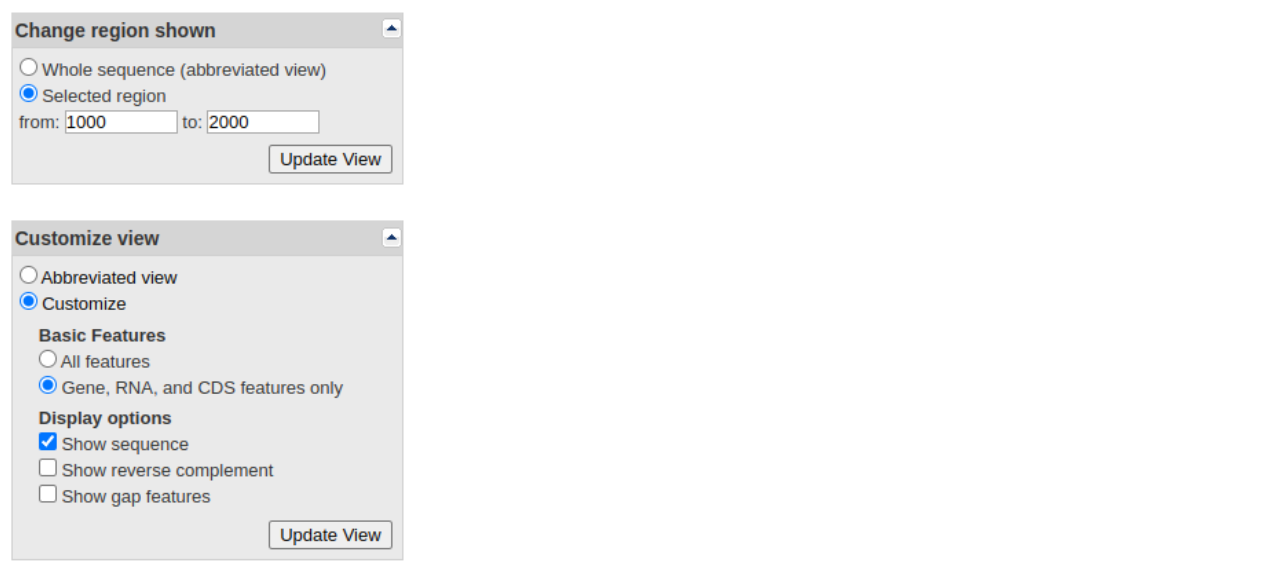

Затем нам потребуется нажать на кнопку "Update view", чтобы содержимое страницы обновилось согласно нашим хотелками. Обратите внимание, что после совершения этого действия в браузере, URL не изменился, то есть мы получили не новую страницу, а скорее изменили уже имеющуюся.

Проблема данной страницы заключается в том, что форма покрывает практически всё, в том числе поисковую строку сверху и совершенно не понятно, к чему данная форма относится, к поисковой строке или к настройке отображения последовательности, а может быть вообще к всему сразу

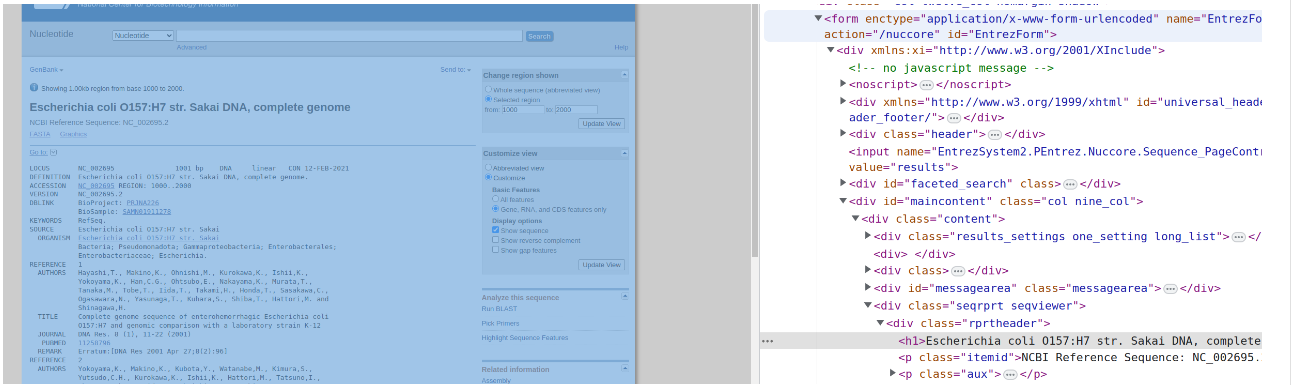

Ну ладно, может быть всё станет понятно, когда мы посмотрим на поля для ввода?

In [8]:
url = "https://www.ncbi.nlm.nih.gov/nuccore/NC_002695.2"
response = requests.get(url)
soup = BeautifulSoup(response.content, "lxml")
soup.find_all("input")

/home/nvaulin/miniforge3/envs/python_bi/lib/python3.12/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


[<input autocomplete="off" class="jig-ncbiclearbutton jig-ncbiautocomplete" data-jigconfig="isEnabled:false,disableUrl:'NcbiSearchBarAutoComplCtrl'" data-sbconfig="ds:'no',pjs:'yes',afs:'yes'" id="term" name="term" title="Search Nucleotide" type="text" value=""/>,
 <input name="EntrezSystem2.PEntrez.Nuccore.Sequence_PageController.PreviousPageName" sid="1" type="hidden" value="results"/>,
 <input format="" id="docsum" name="EntrezSystem2.PEntrez.Nuccore.Sequence_ResultsPanel.Sequence_DisplayBar.sPresentation" sid="1" type="radio" value="docsum"/>,
 <input checked="true" format="" id="genbank" name="EntrezSystem2.PEntrez.Nuccore.Sequence_ResultsPanel.Sequence_DisplayBar.sPresentation" sid="2" type="radio" value="genbank"/>,
 <input format="" id="gbwithparts" name="EntrezSystem2.PEntrez.Nuccore.Sequence_ResultsPanel.Sequence_DisplayBar.sPresentation" sid="3" type="radio" value="gbwithparts"/>,
 <input format="" id="fasta" name="EntrezSystem2.PEntrez.Nuccore.Sequence_ResultsPanel.Sequence

Что-то многовато полей для ввода, разобраться будет сложно.

Хорошо, что для работы с такими сложными случаями есть альтернативный подход, который сильно упрощает жизнь, и, в том числе, работает с простыми случаями. Про него мы поговорим дальше

### Работа с вкладкой Network в инструментах для разработчика

Находясь нужной странице перейдите во вкладку **Network** в инструментах для разработчика. Её содержимое выглядит как-то вот так

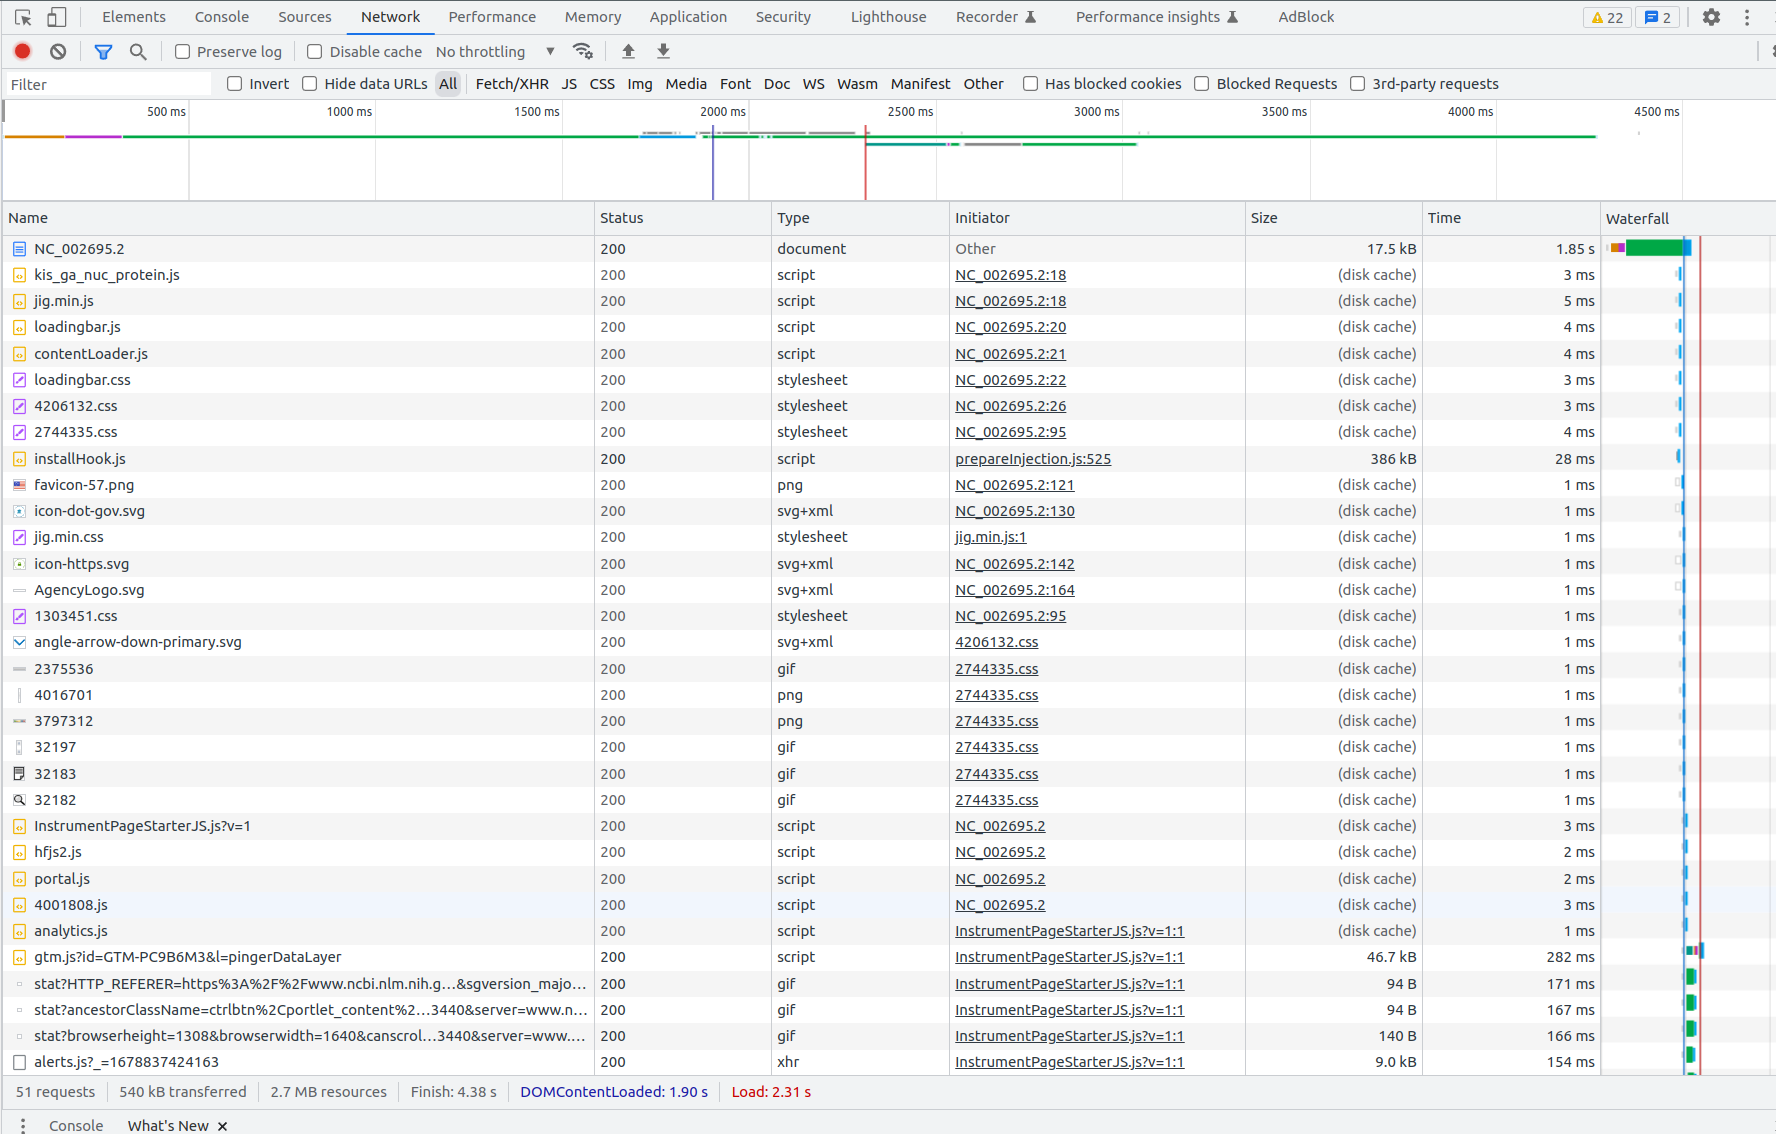

Выглядит немного страшно, но на самом деле тут всё просто, мы же в конце концов разработчики.

В данном меню у нас есть длинный список из **чего-то**.

Это **что-то** является **списком всех запросов**, которые наш браузер совершает в качестве клиента. Здесь в реальном времени отслеживаются абсолютно все запросы с данной страницы:
1. Запросы на получение картинок
2. Запросы на получение JavaScript 
3. Запросы на получение стилей
4. Запросы на получение файлов
5. **Запросы на получение HTML страниц**

Что же нам с этим делать? Процесс можно разделить на несколько этапов
1. Необходимо очистить список уже сохранённых запросов кнопкой ![image.png](attachment:39f3d172-c1d0-4628-9439-42fca3ac182d.png) на панели сверху
2. Необходимо совершить нужное действие на странице. В нашем случае нажать на кнопку "Update view"

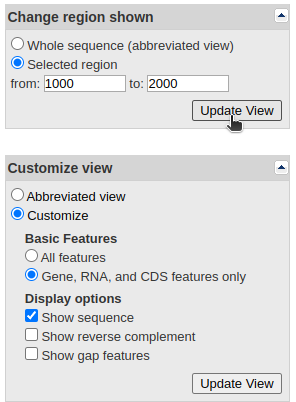

3. После нажатия на кнопку наш браузер начнёт совершать какие-то запросы, и **все эти запросы** отобразятся во вкладке **Network**
4. Далее можно остановить запись запросов кнопкой ![image.png](attachment:4544485d-a41e-4561-92c5-05549bdd7883.png), так как мы уже получили нужные нам запросы и мы не хотим, чтобы в список попали лишние
5. В итоговом списке мы имеем все запросы имеющие отношение к тому действию, которое мы совершили на сайте. Далее мы будем работать с этим списком

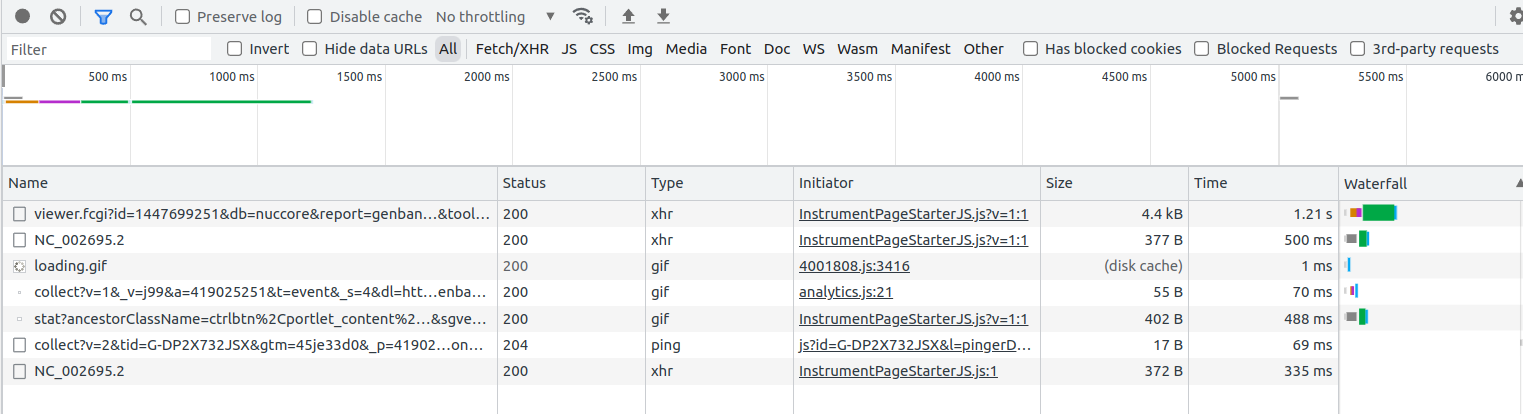

#### Меню запроса

При клике на конкретный запрос нам открывается меню запроса. Здесь собрана вся нужная нам информация о запросе.
1. Полный URL запроса (вкладка **Headers**)
2. Метод запроса (вкладка **Headers**)
3. Статус-код ответа (вкладка **Headers**)
4. Все заголовки запроса и ответа (вкладка **Headers**)
5. Содержимое тела запроса (вкладка **Payload**)
6. Содеримое тела ответа (вкладка **Response**)
7. и многое другое

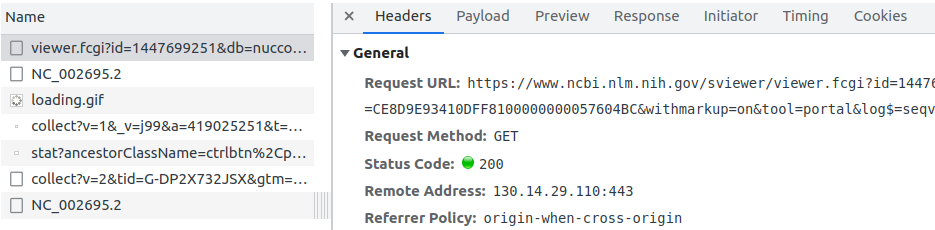

#### Анализируем список запросов

Очень важно научиться хорошо отличать на глаз "нужные" запросы от ненужных. Этого проще добиться опытным путём, но в данном случае можно заметить некоторые закономерности:
1. Для некоторых запросов в колонке **Type** указано `gif`. Скорее всего это какие-то запросы, которые были нужны для загрузки картинки, **они нам не интересны**
2. Нажмём на предпоследний запрос и откроем меню запроса. В URL запроса мы увидим хоста `www.google-analytics.com`, очень маловероятно, что Genbank хранит последовательности на сервере гугла, поэтому данный запрос мы **пропускаем**
3. Проверим второй запрос. Для него уже указан более адекватный URL (`https://www.ncbi.nlm.nih.gov/nuccore/NC_002695.2`) и, в целом, он выглядит подходяще. Проверив вкладку **Payload**, мы даже увидим, что в теле запроса были параметры `1000` и `2000`, обозначающие наш целевой интервал, это очень хороший знак! Тем не менее содержимое вкладки **Response** пусто, что довольно странно. Так что на всякий случай проверим ещё и первый запрос

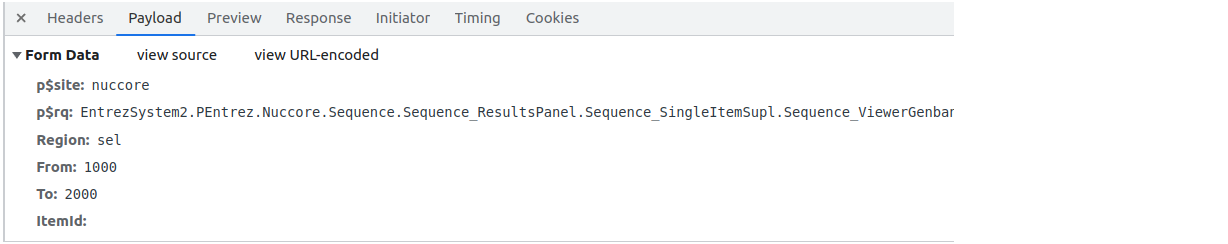

4. Перед тем как более подробно проверять первый запрос, заметим, что в колонке **Time** для данного запроса указана продолжительность в **1.21s**, что довольно долго для обычного запроса. Это сигнализирует нам о том, что запрос загружал какой-то относительно большой объём данных. Из меню запроса мы выясним, что это GET запрос на URL, принадлежащий NCBI. Во вкладке **Payload** указаны параметры query string среди которых есть и наш интервал `1000` и `2000`, а также дополнительные параметры. А во вкладке **Response** мы увидим содержимое HTML страницы, на которой есть нужная нам последовательность!!!

Учитывая все факторы, первый запрос подходит нам больше всего (первый на вкладке Network, четвёртый из тех, что мы рассматривали). Однако, как вы могли заметить, рассуждения выше применимы только к данному случаю. При анализе других страниц нужно всегда в первую очередь опираться на контекст задачи, универсальных правил и рекомендаций здесь нет. Золотое правило тут только одно &mdash; **если в результате какого-то действия в браузере у вас на странице появиись какие-то данные, значит запрос, который это сделал, уже присутствует на вкладке Network** (исключение составляют только данные сгененерированные у вас локально, без участия запросов)

Повторить найденный запрос в питоне проще простого, в меню запроса есть все необходимые данные, нужно просто правильно перенести это в питон

In [9]:
query_string_params = {
    "id": "1447699251",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "retmode": "html",
    "ncbi_phid": "CE8D9E93410DFF8100000000057604BC",
    "withmarkup": "on",
    "tool": "portal",
    "log$": "seqview",
    "maxdownloadsize": "1000000"
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
soup = BeautifulSoup(response.content, "lxml")
sequence_elements = soup.find_all("span", class_="ff_line")
sequence = "".join([elem.text.replace(" ", "") for elem in sequence_elements])
sequence

'cctgtttacgcgccgattgttgcgagatttggacggacgttgacggggtatatacctgcgacccgcgtcaggtgcccgatgcgaggttgttgaaatcgatgtcctaccaggaagcgatggagctttcctacttcggcgctaaagttcttcacccccgcaccattacccccatcgcccagttccagatcccttgcctgattaaaaataccggaaatcctcaagctccaggtacgctcattggtgccagtcgtgatgaagacgaattaccggtcaagggcatttccaatctgaataatatggcaatgttcagcgtttccggcccggggatgaaaggaatggtcggcatggcggcgcgcgtctttgctgcaatgtcacgcgcccgtatttccgtggtgctgattacgcaatcatcttccgaatacagtatcagtttctgcgttccgcaaagcgactgtgtgcgagctgaacgggcaatgcaggaagagttctacctggaactgaaagaaggcttactggagccgctggcggtgacggaacggctggccattatctcggtggtaggtgatggtatgcgcaccttgcgtgggatctcggcgaaattctttgccgcgctggcccgcgccaatatcaacattgtcgctattgctcagggatcttctgaacgctcaatctctgtcgtggtaaataacgatgatgcgaccactggcgtgcgcgttactcatcagatgctgttcaataccgatcaggttatcgaagtgtttgtgattggcgtcggtggcgttggcggtgcgctgctggagcaactgaagcgtcagcaaagctggttgaagaataaacatatcgacttacgtgtctgcggtgttgctaactcgaaggctctgctcaccaatgtgcatggcctaaatctggaaaactggcaggaagaactggcgcaagccaaagagccgtttaatctcgggcgcttaattcgcctcgtgaaagaatatcatctgctgaacc

Всё работает, мы смогли сделать нужный запрос и получить последовательность. Далеко не факт, что мы смогли бы так сделать исследуя только HTML

#### Анализируем параметры запроса

Многие из найденных параметров для данного запроса являются избыточными для нашей задачи и их можно попробовать удалить, опять же всё выясняется опытным путём. В этом примере набор параметров можно сократить до следующего:

In [10]:
query_string_params = {
    "id": "1447699251",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "withmarkup": "on",
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
soup = BeautifulSoup(response.content, "lxml")
sequence_elements = soup.find_all("span", class_="ff_line")
sequence = "".join([elem.text.replace(" ", "") for elem in sequence_elements])
sequence

'cctgtttacgcgccgattgttgcgagatttggacggacgttgacggggtatatacctgcgacccgcgtcaggtgcccgatgcgaggttgttgaaatcgatgtcctaccaggaagcgatggagctttcctacttcggcgctaaagttcttcacccccgcaccattacccccatcgcccagttccagatcccttgcctgattaaaaataccggaaatcctcaagctccaggtacgctcattggtgccagtcgtgatgaagacgaattaccggtcaagggcatttccaatctgaataatatggcaatgttcagcgtttccggcccggggatgaaaggaatggtcggcatggcggcgcgcgtctttgctgcaatgtcacgcgcccgtatttccgtggtgctgattacgcaatcatcttccgaatacagtatcagtttctgcgttccgcaaagcgactgtgtgcgagctgaacgggcaatgcaggaagagttctacctggaactgaaagaaggcttactggagccgctggcggtgacggaacggctggccattatctcggtggtaggtgatggtatgcgcaccttgcgtgggatctcggcgaaattctttgccgcgctggcccgcgccaatatcaacattgtcgctattgctcagggatcttctgaacgctcaatctctgtcgtggtaaataacgatgatgcgaccactggcgtgcgcgttactcatcagatgctgttcaataccgatcaggttatcgaagtgtttgtgattggcgtcggtggcgttggcggtgcgctgctggagcaactgaagcgtcagcaaagctggttgaagaataaacatatcgacttacgtgtctgcggtgttgctaactcgaaggctctgctcaccaatgtgcatggcctaaatctggaaaactggcaggaagaactggcgcaagccaaagagccgtttaatctcgggcgcttaattcgcctcgtgaaagaatatcatctgctgaacc

Можно догадаться, что `id` это некоторый уникальный идентификатор последовательности в Genbank, так как в запросе нет других параметров по которым потенциально можно было бы идентифицировать последовательность. Если бы мы выяснили способ нахождения соответствия между Genbank ID (NC_002695.2) и этой штукой, то мы смогли бы скачивать произвольные последовательности при помощи запросов. Хотя чисто из любопытства, подставив `NC_002695.2` в качестве `id`, мы выясним, что это тоже работает!

Вот так, буквально две строки кода и мы уже умеем скачивать любую последовательность с Genbank без использования каких-то специализированных библиотек (requests и bs4 не в счёт)

In [11]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "withmarkup": "on",
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
soup = BeautifulSoup(response.content, "lxml")
sequence_elements = soup.find_all("span", class_="ff_line")
sequence = "".join([elem.text.replace(" ", "") for elem in sequence_elements])
sequence

'cctgtttacgcgccgattgttgcgagatttggacggacgttgacggggtatatacctgcgacccgcgtcaggtgcccgatgcgaggttgttgaaatcgatgtcctaccaggaagcgatggagctttcctacttcggcgctaaagttcttcacccccgcaccattacccccatcgcccagttccagatcccttgcctgattaaaaataccggaaatcctcaagctccaggtacgctcattggtgccagtcgtgatgaagacgaattaccggtcaagggcatttccaatctgaataatatggcaatgttcagcgtttccggcccggggatgaaaggaatggtcggcatggcggcgcgcgtctttgctgcaatgtcacgcgcccgtatttccgtggtgctgattacgcaatcatcttccgaatacagtatcagtttctgcgttccgcaaagcgactgtgtgcgagctgaacgggcaatgcaggaagagttctacctggaactgaaagaaggcttactggagccgctggcggtgacggaacggctggccattatctcggtggtaggtgatggtatgcgcaccttgcgtgggatctcggcgaaattctttgccgcgctggcccgcgccaatatcaacattgtcgctattgctcagggatcttctgaacgctcaatctctgtcgtggtaaataacgatgatgcgaccactggcgtgcgcgttactcatcagatgctgttcaataccgatcaggttatcgaagtgtttgtgattggcgtcggtggcgttggcggtgcgctgctggagcaactgaagcgtcagcaaagctggttgaagaataaacatatcgacttacgtgtctgcggtgttgctaactcgaaggctctgctcaccaatgtgcatggcctaaatctggaaaactggcaggaagaactggcgcaagccaaagagccgtttaatctcgggcgcttaattcgcctcgtgaaagaatatcatctgctgaacc

`db` это явно указание на базу данных. `nuccore` в терминологии NCBI это Genbank, а учитывая то, что в остальных местах в запросе нет никакого указания на БД, то этот параметр скорее всего также можно варьировать, надо только выяснить принимаемые им значения.

С первого взгляда не понятно, что такое `report`. Но учитывая то, что он принимает значение `genbank`, а параметр для указания БД у нас уже был, то с большой вероятностью это указание на формат данных. Ради эксперимента попробуем указать туда `fasta` и убедимся, что это работает

In [12]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "fasta",
    "from": "1000",
    "to": "2000",
    "withmarkup": "on",
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
print(response.text)

>NC_002695.2:1000-2000 Escherichia coli O157:H7 str. Sakai DNA, complete genome
CCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTATATACCTGCGACCCGCGTCA
GGTGCCCGATGCGAGGTTGTTGAAATCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCT
AAAGTTCTTCACCCCCGCACCATTACCCCCATCGCCCAGTTCCAGATCCCTTGCCTGATTAAAAATACCG
GAAATCCTCAAGCTCCAGGTACGCTCATTGGTGCCAGTCGTGATGAAGACGAATTACCGGTCAAGGGCAT
TTCCAATCTGAATAATATGGCAATGTTCAGCGTTTCCGGCCCGGGGATGAAAGGAATGGTCGGCATGGCG
GCGCGCGTCTTTGCTGCAATGTCACGCGCCCGTATTTCCGTGGTGCTGATTACGCAATCATCTTCCGAAT
ACAGTATCAGTTTCTGCGTTCCGCAAAGCGACTGTGTGCGAGCTGAACGGGCAATGCAGGAAGAGTTCTA
CCTGGAACTGAAAGAAGGCTTACTGGAGCCGCTGGCGGTGACGGAACGGCTGGCCATTATCTCGGTGGTA
GGTGATGGTATGCGCACCTTGCGTGGGATCTCGGCGAAATTCTTTGCCGCGCTGGCCCGCGCCAATATCA
ACATTGTCGCTATTGCTCAGGGATCTTCTGAACGCTCAATCTCTGTCGTGGTAAATAACGATGATGCGAC
CACTGGCGTGCGCGTTACTCATCAGATGCTGTTCAATACCGATCAGGTTATCGAAGTGTTTGTGATTGGC
GTCGGTGGCGTTGGCGGTGCGCTGCTGGAGCAACTGAAGCGTCAGCAAAGCTGGTTGAAGAATAAACATA
TCGACTTACGTGTCTGCGGTGTTGCTAACTCGAAGGCTCTGCTCACCAATGTGCATGGCCTAAATCTG

Ну и с параметрами для интервалов тоже всё понятно, их можно варьировать

In [13]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "fasta",
    "from": "999",
    "to": "1102",
    "withmarkup": "on",
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
print(response.text)

>NC_002695.2:999-1102 Escherichia coli O157:H7 str. Sakai DNA, complete genome
GCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTATATACCTGCGACCCGCGTC
AGGTGCCCGATGCGAGGTTGTTGAAATCGATGTC




Что такое `withmarkup` не совсем понятно. Но попробовав различные варианты запросов, различные значения для данного параметра ("on" и "off"), а также его полное удаление, можно сделать вывод, что данный параметр показывает, будет ли использован HTML в тексте ответа в Genbank формате

In [14]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "withmarkup": "on",   # С использованием HTML в последовательности
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
print(*response.text.split("\n")[-10:], sep="\n")

      661 <span class="ff_line" id="NC_002695.2_661">aacgctcaat ctctgtcgtg gtaaataacg atgatgcgac cactggcgtg cgcgttactc</span>
      721 <span class="ff_line" id="NC_002695.2_721">atcagatgct gttcaatacc gatcaggtta tcgaagtgtt tgtgattggc gtcggtggcg</span>
      781 <span class="ff_line" id="NC_002695.2_781">ttggcggtgc gctgctggag caactgaagc gtcagcaaag ctggttgaag aataaacata</span>
      841 <span class="ff_line" id="NC_002695.2_841">tcgacttacg tgtctgcggt gttgctaact cgaaggctct gctcaccaat gtgcatggcc</span>
      901 <span class="ff_line" id="NC_002695.2_901">taaatctgga aaactggcag gaagaactgg cgcaagccaa agagccgttt aatctcgggc</span>
      961 <span class="ff_line" id="NC_002695.2_961">gcttaattcg cctcgtgaaa gaatatcatc tgctgaaccc g</span>
//</pre>
<a name="slash_NC_002695.2"></a></div>




In [15]:
query_string_params = {
    "id": "NC_002695.2",
    "db": "nuccore",
    "report": "genbank",
    "from": "1000",
    "to": "2000",
    "withmarkup": "off",   # Без использования HTML в последовательности
}

response = requests.get("https://www.ncbi.nlm.nih.gov/sviewer/viewer.fcgi", params=query_string_params)
print(*response.text.split("\n")[-10:], sep="\n")

      661 aacgctcaat ctctgtcgtg gtaaataacg atgatgcgac cactggcgtg cgcgttactc
      721 atcagatgct gttcaatacc gatcaggtta tcgaagtgtt tgtgattggc gtcggtggcg
      781 ttggcggtgc gctgctggag caactgaagc gtcagcaaag ctggttgaag aataaacata
      841 tcgacttacg tgtctgcggt gttgctaact cgaaggctct gctcaccaat gtgcatggcc
      901 taaatctgga aaactggcag gaagaactgg cgcaagccaa agagccgttt aatctcgggc
      961 gcttaattcg cctcgtgaaa gaatatcatc tgctgaaccc g
//</pre>
<a name="slash_NC_002695.2"></a></div>




Но вернёмся ненадолго к запросу, который мы отбросили, но который был довольно многообещающим, проверим его для чистоты эксперимента

In [16]:
payload = {
    "p$site": "nuccore",
    "p$rq": "EntrezSystem2.PEntrez.Nuccore.Sequence.Sequence_ResultsPanel.Sequence_SingleItemSupl.Sequence_ViewerGenbankSidePanel.Sequence_ViewerChangeRegion:SetSelRegion",
    "Region": "sel",
    "From": "1000",
    "To": "2000",
    "ItemId": ""
}

response = requests.post("https://www.ncbi.nlm.nih.gov/nuccore/NC_002695.2", data=payload)
response.text

'{}'

Действительно, ничего интересного

### Что вообще происходило в последнем примере? Где тут системность?

**Web scrapping**, как уже упоминалось ранее, это крайне творческий процесс, и, я думаю, вы уже успели это заметить. Существуют простые сайты, как [wooordhunt](https://wooordhunt.ru/), с которыми можно за минуту составить запрос, глядя только на HTML или URL. Но бывают и сложные сайты у которых очень запутанные системы запросов, форм и так далее. Нужно вручную анализировать запросы и пытаться понять смысл параметров этих запросов из контекста, как мы это делали в примерах выше, тогда вы сможете эффективно пользоваться данной технологией. Ни о какой системности тут, к сожалению не может идти и речи, к каждому сайту нужен свой подход. Так что не бойтесь эксперементировать и ошибаться

Но давайте попробуем представить картину того, как устроена исследуемая нами страница.

На странице есть форма, которая покрывает всю страницу и отправляется на URL `/nuccore` при помощи POST запроса (это можно выяснить, глядя на тэг `form`). Это идёт вразрез с тем, что мы обнаружили. Наш запрос делается на URL `/sviewer/viewer.fcgi` при помощи GET запроса. Это значит, что форма скорее всего ответственна за поисковую строку вверху страницы, но не за отображение последовательности. Но также возможен вариант, когда после запроса с заполненной формой на адрес `/nuccore` происходит **перенаправление (Redirect)**

Но если настройки отображения последовательности не привязаны к форме, то как тогда происходит запрос?

Скорее всего к кнопке "Update view" привязан какой-то скрипт, который берёт значения из нужных тэгов `input` и внутри себя формирует и делает нужный запрос, то есть не имеет никакого отношения к форме. Такие ситуации можно поймать только при помощи Developer Tools. К сожалению, такая практика является относительно распространённой, то есть логика запросов передаётся от браузера (который тупо берёт URL из тэга `form` и делает запрос) к скриптам, поведение которых может быть сложным и заранее неизвестным.

Также можно заметить, что наш целевой обнаруженный запрос вовращает не всю HTML страницу целиком, а только ту часть, которая ответственна за отображение информации о последовательности. То есть при нажатии "Update view" гипотетический скрипт, который делает запрос, получает эти данные и **встраивает** в уже имеющуюся страницу. Это объясняет тот факт, что у нас в процессе не изменяется URL, так как по сути мы остаёмся на той же самой странице, но делаем запрос только  для получения новых данных, чтобы отобразить их на этой же странице

## Ограничения web scrapping'а

Web scrapping о котором мы говорили последние две лекции это довольно крутая штука, но не все сайты любят, когда вы этим занимаетесь, поэтому они могут создавать некоторые ограничения. При этом, чем популярнее сервис, тем выше вероятность, что он будет хорошо защищён. С другой стороны, у популярных сервисов почти всегда есть публичный API. При наличии оного вам следует отдавать предпочтение именно ему, а не web scrapping'у. Но публичный API есть не всегда, а получать данные в автоматическом режиме как-то хочется, поэтому вы можете столкнуться с следующими преградами

### Блокировка частых запросов

Все механизмы борьбы с web scrapping'ом основаны на детектировании того, что вы не человек, сидящий в интернете через браузер, а автоматизированная программа.

Один из самых простых вариантов детекции скрэпперов это детекция по **частоте запросов**. Чем чаще вы делаете запросы, тем более вероятно, что на вас падёт подозрение. В случае детекции вашему IP адресу временно ограничат доступ к ресурсу. Обойти это очень просто, нужно делать запросы через какие-то интервалы времени

Вот так не годится, вас быстро заблокируют
```python
for _ in range(100000):
    requests.get(url)
```

Вот так уже лучше
```python
for _ in range(100000):
    requests.get(url)
    time.sleep(0.1)
```

А вот так вас почти точно не заметят
```python
for _ in range(100000):
    requests.get(url)
    time.sleep(1)
```

### Капчи

В случае, если сервис поймёт, что вы скрэппер, то он может предложить вам ввести капчу. И да, эта проверка сделана не чтобы отличить вас от робота по интеллектуальным способностям, а просто чтобы вставить вам палку в колесо и не дать вам сделать запрос. Современные нейросети с лёгкостью решают каптчи, вся проблема тут в том, чтобы написать код для взаимодействия с ними. Заполнение каптчи через питон это отдельная головная боль, лучше просто забить на это

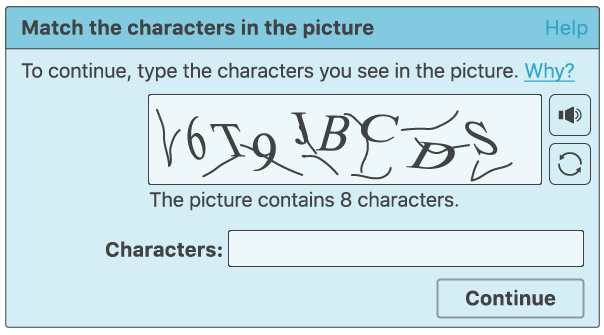

### Сервисы, расчитанные на низкую нагрузку

Малопопулярные сервисы могут не иметь никакой защиты и более того, не выдерживать большой нагрузки по входящим запросам. Ваши запросы из питона могут просто заблокировать использование сервиса для других пользователей (так как ему может не хватить вычислительных ресурсов для обработки всех запросов). Будьте аккуратнее с такими сервисами и не забывайте, что другие люди тоже, возможно, хотят ими воспользоваться, вы в интернете не одни

### Скреппинг персональных данных

Web scrapping абсолютно легален с точки зрения законодательств разных стран. Однако, не стоит заниматься скреппингом персональных данных (в том числе общедоступных), а также интеллектуальной собственности, это считается неэтичным

### Другие варианты детекции

Обнаружить, что вы скреппер можно по вашему заголовку `user-agent` в запросе, по кукам, по IP адресу, по паттерну запросов и много по чему ещё, поэтому не все веб-сайты доступны для скрэппинга. Например, Яндекс-маркет, детектирует скреппинг с одного запроса и кидает капчу

# Итог

Теперь вы уверенно можете пользоваться интернетом из Python, вытаскивать нужную информацию с веб-страниц, анализировать URL и моделировать сложные действия на сайте при помощи питона. Для большей практики просто достаточно найти любой понравившийся вам сайт.

Обобщённый алгоритм получения информации из интернета через питон можно представить так:
1. Определите то, что вы ищите
2. Проделайте действия для получения нужной информации в веб-браузере
3. Определите, какие запросы стоят за действиями из пункта 2 и какие данные отправляются/получаются в этих запросах
4. Воспоизведите запросы из пункта 3 в питоне
5. Распарсите/обработайте/сохраните полученные из запросов данные